# Gun Violence USA Project - #ForaTrump

DADOS
Dataframe: engloba dados de violência em todos os estados dos USA entre 2013 - 2018 (www.gunviolencearchive.org)

OBJETIVO Geral: analisar os dados de crimes e pessoas afetadas em todos os estados dos USA no intervalo de 2013 - 2018
por ano, mês e estado, além de correlacionar os dados com tamanho populacional e índices sociais. 

PERGUNTAS:
1) EXISTE UM AUMENTO NO NÚMERO DE PESSOAS ACOMETIDAS PELOS CRIMES COM ARMAS AO LONGO DOS ANOS ANALISADOS?
2) EXISTEM MESES QUE APRESENTAM UM MAIOR NÚMERO DE PESSOAS ACOMETIDAS PELOS CRIMES COM ARMAS NOS USA?
3) QUAIS SÃO OS TOP10 ESTADOS COM MAIOR E MENOR NÚMERO DE PESSOAS ACOMETIDAS PELOS CRIMES COM ARMAS?
4) QUAIS SÃO AS CIDADES MAIS VIOLENTOS?
5) QUAL O INCREMENTO PERCENTUAL 
6) HÁ DIFERENÇA ENTRE GÊNEROS EM RELAÇÃO AOS INCIDENTES ENVOLVIDO ARMAS NOS USA?
7) EXISTE CORRELAÇÃO ENTRE O DE CRIMES COM ARMAS COM O TAMANHO POPULACIONAL E ÍNDICES SOCIAIS?

HIPÓTESE GERAL: O número de pessoas acometidas pelos crimes com armas aumentam ao longo dos anos, bem como o número de crimes apresentará correlacões com o tamanho populacional, quantidade de armas e índices sociais.    





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from statsmodels.graphics.gofplots import qqplot
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import pylab
#from sklearn import linear_model
sns.set(style="whitegrid",context="talk")
sns.set(rc={'figure.figsize':(41.7,38.27)})
%matplotlib inline

pd.set_option('display.max_rows', 20)
gun_viol = pd.read_csv('/home/gabi/DSP19/DSP19_Course/gun-violence-data/gun-violence-data_01-2013_03-2018.csv', sep=",")


In [3]:
gun_viol.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [4]:
gun_viol.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [5]:
gun_viol.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
                                ...   
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type                object
sources                         object
state_house_district           float64
state_senate_district          float64
Length: 29, dtype: object

In [6]:
gun_viol.index

RangeIndex(start=0, stop=239677, step=1)

In [7]:
#Sumário dos dados 

# Get a summary of the datasets
def summary(df):
    # Identify the Data Types
    s_df = pd.DataFrame(df.dtypes, columns=['Dtype'])

    # Identify the unique values
    s_df['Nunique'] = df.nunique()

    # Identify the Missing values
    s_df['MissingValues'] = df.isnull().sum()

    # Identify the count for each variable
    s_df['Count'] = df.count()

    # Identify the zero values for each variable
    s_df['ZeroValues'] = (df == 0).sum()

    print(s_df)
    
summary(gun_viol)

                               Dtype  Nunique  MissingValues   Count  \
incident_id                    int64   239677              0  239677   
date                          object     1725              0  239677   
state                         object       51              0  239677   
city_or_county                object    12898              0  239677   
address                       object   198037          16497  223180   
n_killed                       int64       16              0  239677   
n_injured                      int64       23              0  239677   
incident_url                  object   239677              0  239677   
source_url                    object   213989            468  239209   
incident_url_fields_missing     bool        1              0  239677   
...                              ...      ...            ...     ...   
participant_age               object    18951          92298  147379   
participant_age_group         object      898          42119  19

In [8]:
#Filtrando colunas de interesse
df_gun = gun_viol[['date', 'state', 'city_or_county', 'n_killed', 'n_injured','gun_type', 'incident_characteristics', 'participant_age', 'participant_gender', 'participant_status',   'participant_type' ]]
df_gun

,date,state,city_or_county,n_killed,n_injured,gun_type,incident_characteristics,participant_age,participant_gender,participant_status,participant_type
0,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,0::20,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,2013-01-01,California,Hawthorne,1,3,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::20,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,2013-01-05,Colorado,Aurora,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,2013-01-07,North Carolina,Greensboro,2,2,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
5,2013-01-07,Oklahoma,Tulsa,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Hom...",0::23||1::23||2::33||3::55,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
6,2013-01-19,New Mexico,Albuquerque,5,0,0::22 LR||1::223 Rem [AR-15],"Shot - Dead (murder, accidental, suicide)||Mas...",0::51||1::40||2::9||3::5||4::2||5::15,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
7,2013-01-21,Louisiana,New Orleans,0,5,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
8,2013-01-21,California,Brentwood,0,4,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
9,2013-01-23,Maryland,Baltimore,1,6,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::15,0::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...


In [173]:
#Criando uma nova coluna Total_people - somatório killed and injured people
df_gun['total_people'] = df_gun['n_killed'] + df_gun['n_injured']
df_gun.head()


/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,state,city_or_county,n_killed,n_injured,gun_type,incident_characteristics,participant_age,participant_gender,participant_status,participant_type,total_people,year,month
0,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,0::20,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,2013,1
1,2013-01-01,California,Hawthorne,1,3,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::20,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,2013,1
2,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,4,2013,1
3,2013-01-05,Colorado,Aurora,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4,2013,1
4,2013-01-07,North Carolina,Greensboro,2,2,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4,2013,1


In [10]:
#Checando colunas
df_gun.columns

Index(['date', 'state', 'city_or_county', 'n_killed', 'n_injured', 'gun_type',
       'incident_characteristics', 'participant_age', 'participant_gender',
       'participant_status', 'participant_type', 'total_people'],
      dtype='object')

In [11]:
#Criando colunas Year e Month
df_gun['year'] = pd.DatetimeIndex(df_gun['date']).year
df_gun['month'] = pd.DatetimeIndex(df_gun['date']).month
df_gun.head()

/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,state,city_or_county,n_killed,n_injured,gun_type,incident_characteristics,participant_age,participant_gender,participant_status,participant_type,total_people,year,month
0,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,0::20,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,2013,1
1,2013-01-01,California,Hawthorne,1,3,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::20,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,2013,1
2,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,4,2013,1
3,2013-01-05,Colorado,Aurora,4,0,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4,2013,1
4,2013-01-07,North Carolina,Greensboro,2,2,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4,2013,1


In [12]:
#organizando as colunas do dataframe filtrado 

df_gun_final = df_gun[['date', 'state', 'city_or_county', 'n_killed', 'n_injured', 'total_people', 'gun_type',
       'incident_characteristics', 'participant_age', 'participant_gender','participant_status', 'participant_type']]
df_gun_final.head()


,date,state,city_or_county,n_killed,n_injured,total_people,gun_type,incident_characteristics,participant_age,participant_gender,participant_status,participant_type
0,2013-01-01,Pennsylvania,Mckeesport,0,4,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,0::20,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...
1,2013-01-01,California,Hawthorne,1,3,4,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::20,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...
2,2013-01-01,Ohio,Lorain,1,3,4,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...
3,2013-01-05,Colorado,Aurora,4,0,4,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...
4,2013-01-07,North Carolina,Greensboro,2,2,4,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...


In [13]:
#add year and month in dataframe 


df_gun_final['year'] = pd.DatetimeIndex(df_gun['date']).year
df_gun_final['month'] = pd.DatetimeIndex(df_gun['date']).month

df_gun_final.head()

/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date,state,city_or_county,n_killed,n_injured,total_people,gun_type,incident_characteristics,participant_age,participant_gender,participant_status,participant_type,year,month
0,2013-01-01,Pennsylvania,Mckeesport,0,4,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,0::20,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1
1,2013-01-01,California,Hawthorne,1,3,4,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::20,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1
2,2013-01-01,Ohio,Lorain,1,3,4,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,2013,1
3,2013-01-05,Colorado,Aurora,4,0,4,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,1
4,2013-01-07,North Carolina,Greensboro,2,2,4,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,1


In [160]:
# Explorando os dados KILLED AND INJURED DATA
## somando o número total de feridos por ano e ordenando pelo número crescente de feridos
total_I_year = df_gun_final.groupby(['year'])['n_injured'].sum().reset_index()
total_I_year = total_I_year.sort_values(['n_injured' ])
total_I_year

,year,n_injured
0,2013,979
5,2018,6171
1,2014,23002
2,2015,26967
3,2016,30580
4,2017,30703


In [15]:
#somando o número total de mortos por ano

total_K_year = df_gun_final.groupby(['year'])['n_killed'].sum().reset_index()
total_K_year.sort_values(['n_killed'], ascending=False)
total_K_year

,year,n_killed
0,2013,317
1,2014,12557
2,2015,13484
3,2016,15066
4,2017,15511
5,2018,3533


In [16]:
#editando para poder gerar o gráfico conjuntamente com número de feridos e mortos por ano

total_I_year['crime'] = 'injured'
total_I_year

,year,n_injured,crime
0,2013,979,injured
5,2018,6171,injured
1,2014,23002,injured
2,2015,26967,injured
3,2016,30580,injured
4,2017,30703,injured


In [17]:
#editando para poder gerar o gráfico conjuntamente com número de feridos e mortos por ano

total_K_year['crime'] = 'killed'
total_K_year

,year,n_killed,crime
0,2013,317,killed
1,2014,12557,killed
2,2015,13484,killed
3,2016,15066,killed
4,2017,15511,killed
5,2018,3533,killed


In [18]:
#Rename columns to plot graphs
total_I_year.rename(columns={'n_injured':'n_crimes'},inplace=True)
total_I_year

,year,n_crimes,crime
0,2013,979,injured
5,2018,6171,injured
1,2014,23002,injured
2,2015,26967,injured
3,2016,30580,injured
4,2017,30703,injured


In [19]:
#Rename columns to plot graphs

total_K_year.rename(columns={'n_killed':'n_crimes'},inplace=True)
total_K_year

,year,n_crimes,crime
0,2013,317,killed
1,2014,12557,killed
2,2015,13484,killed
3,2016,15066,killed
4,2017,15511,killed
5,2018,3533,killed


In [20]:
#Concat dataframes to plot graph killed and injured people
n_crimes_year = pd.concat([total_I_year, total_K_year])
n_crimes_year.head()

,year,n_crimes,crime
0,2013,979,injured
5,2018,6171,injured
1,2014,23002,injured
2,2015,26967,injured
3,2016,30580,injured


Text(33.6188671875, 0.5, 'n_injured')

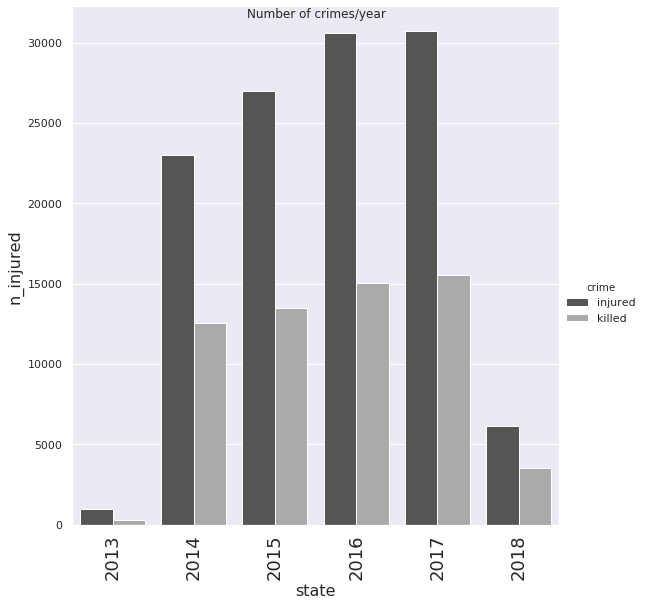

In [21]:
#Número de mortos e feridos por ano

graph_1=sns.catplot(x='year',y='n_crimes', hue='crime', kind='bar',data=n_crimes_year, height=8, palette='gray').set_xticklabels(rotation=90)
(graph_1.fig.suptitle('Number of crimes/year'))

plt.xticks(fontsize=18)
plt.xlabel("state", fontsize=16)
plt.ylabel("n_injured", fontsize=16)

In [22]:
#Somando e ordenando número de mortos por mês.

df_kill_month = df_gun_final.groupby(['month'])['n_killed'].sum().reset_index()
df_kill_month = df_kill_month.sort_values(['month'])
df_kill_month.head()

,month,n_killed
0,1,6035
1,2,4945
2,3,5641
3,4,4383
4,5,4830


In [23]:
#substituindo os números pelos nomes dos meses do ano - killed

count = 1
months = ['Jan', 'Feb', 'Mar', 'Aph', 'May', 'Jun', 'Jul','Aug', 'Sep','Oct','Nov', 'Dec']

for i in months:
    df_kill_month = df_kill_month.replace(count,i)
    count +=1
df_kill_month.head()

,month,n_killed
0,Jan,6035
1,Feb,4945
2,Mar,5641
3,Aph,4383
4,May,4830


In [24]:
#Somando número de feridos por mês

df_injured_month = df_gun_final.groupby(['month'])['n_injured'].sum().reset_index()
df_injured_month = df_injured_month.sort_values(['month'])
df_injured_month.head()

,month,n_injured
0,1,10946
1,2,8420
2,3,10475
3,4,8907
4,5,10244


In [25]:
#sustituindo número por palavra - injured
count = 1
months = ['Jan', 'Feb', 'Mar', 'Aph', 'May', 'Jun', 'Jul','Aug', 'Sep','Oct','Nov', 'Dec']

for i in months:
    df_injured_month = df_injured_month.replace(count,i)
    count +=1
df_injured_month.head()

,month,n_injured
0,Jan,10946
1,Feb,8420
2,Mar,10475
3,Aph,8907
4,May,10244


In [26]:
# somando o número total de mortos por estado o ordenando por ordem decrescente

total_K_state = df_gun_final.groupby(['state'])['n_killed'].sum().reset_index()
total_K_state = total_K_state.sort_values(['n_killed'], ascending=False)
total_K_state.head()

,state,n_killed
4,California,5562
43,Texas,5046
9,Florida,3909
13,Illinois,3409
35,Ohio,2508


In [27]:
#editando para poder gerar o gráfico conjuntamente com número de feridos e mortos por mês

df_injured_month['crime'] = 'injured'
df_injured_month.head()

,month,n_injured,crime
0,Jan,10946,injured
1,Feb,8420,injured
2,Mar,10475,injured
3,Aph,8907,injured
4,May,10244,injured


In [28]:
#editando para poder gerar o gráfico conjuntamente com número de feridos e mortos por mês

df_kill_month['crime'] = 'killed'
df_kill_month.head()


,month,n_killed,crime
0,Jan,6035,killed
1,Feb,4945,killed
2,Mar,5641,killed
3,Aph,4383,killed
4,May,4830,killed


In [29]:
#Rename columns to plot graph - injured 
df_injured_month.rename(columns={'n_injured':'n_crimes'},inplace=True)
df_injured_month.head()

,month,n_crimes,crime
0,Jan,10946,injured
1,Feb,8420,injured
2,Mar,10475,injured
3,Aph,8907,injured
4,May,10244,injured


In [30]:
#Rename columns to plot graph - killed 
df_kill_month.rename(columns={'n_killed':'n_crimes'},inplace=True)
df_kill_month.head()

,month,n_crimes,crime
0,Jan,6035,killed
1,Feb,4945,killed
2,Mar,5641,killed
3,Aph,4383,killed
4,May,4830,killed


In [31]:
#concat tables to plot graph killed and injured 
n_crimes_month = pd.concat([df_injured_month, df_kill_month])
n_crimes_month.head()

,month,n_crimes,crime
0,Jan,10946,injured
1,Feb,8420,injured
2,Mar,10475,injured
3,Aph,8907,injured
4,May,10244,injured


Text(0.5, 0.98, 'Number of crimes/month')

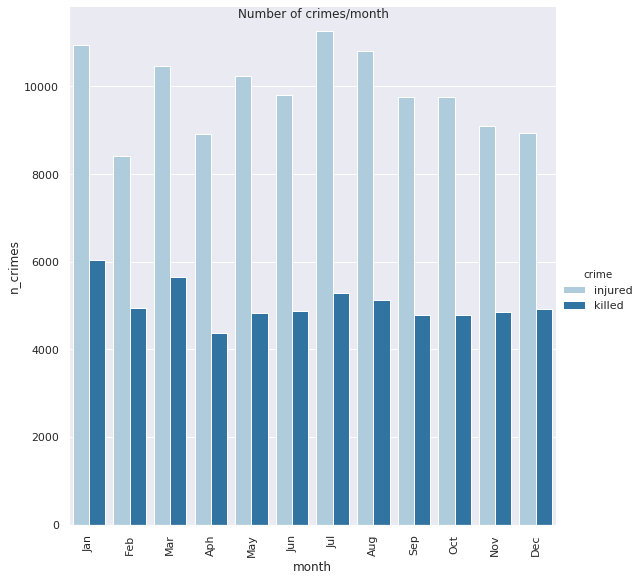

In [32]:
#Número de mortos e feridos por mês

graph_2=sns.catplot(x='month',y='n_crimes', hue='crime', kind='bar',data=n_crimes_month, height=8, palette='Paired').set_xticklabels(rotation=90)
(graph_2.fig.suptitle('Number of crimes/month'))

In [33]:
# somando o número total de feridos por estado e ordenando pelo número decrescente de feridos

total_I_state = df_gun_final.groupby(['state'])['n_injured'].sum().reset_index()
total_I_state = total_I_state.sort_values(['n_injured'], ascending=False)
total_I_state.head()

,state,n_injured
13,Illinois,13514
4,California,7644
9,Florida,7072
43,Texas,6106
35,Ohio,5703


In [34]:
##editando para poder gerar o gráfico conjuntamente com número de feridos e mortos por estado

total_I_state['crime'] = 'injured'
total_I_state.head()

,state,n_injured,crime
13,Illinois,13514,injured
4,California,7644,injured
9,Florida,7072,injured
43,Texas,6106,injured
35,Ohio,5703,injured


In [35]:
#rename columns to plot 
total_K_state['crime'] = 'killed'
total_K_state.head()

,state,n_killed,crime
4,California,5562,killed
43,Texas,5046,killed
9,Florida,3909,killed
13,Illinois,3409,killed
35,Ohio,2508,killed


In [36]:
#rename columns to plot 
total_I_state.rename(columns={'n_injured':'n_crimes'},inplace=True)
total_I_state.head()

,state,n_crimes,crime
13,Illinois,13514,injured
4,California,7644,injured
9,Florida,7072,injured
43,Texas,6106,injured
35,Ohio,5703,injured


In [37]:
#Rename columns 
total_K_state.rename(columns={'n_killed':'n_crimes'},inplace=True)
total_K_state.head()

,state,n_crimes,crime
4,California,5562,killed
43,Texas,5046,killed
9,Florida,3909,killed
13,Illinois,3409,killed
35,Ohio,2508,killed


In [38]:
#Concat dataframes 
n_crimes_state = pd.concat([total_I_state, total_K_state])
n_crimes_state.head()

,state,n_crimes,crime
13,Illinois,13514,injured
4,California,7644,injured
9,Florida,7072,injured
43,Texas,6106,injured
35,Ohio,5703,injured


Text(0.5, 0.98, 'Number of killed and injured people/state')

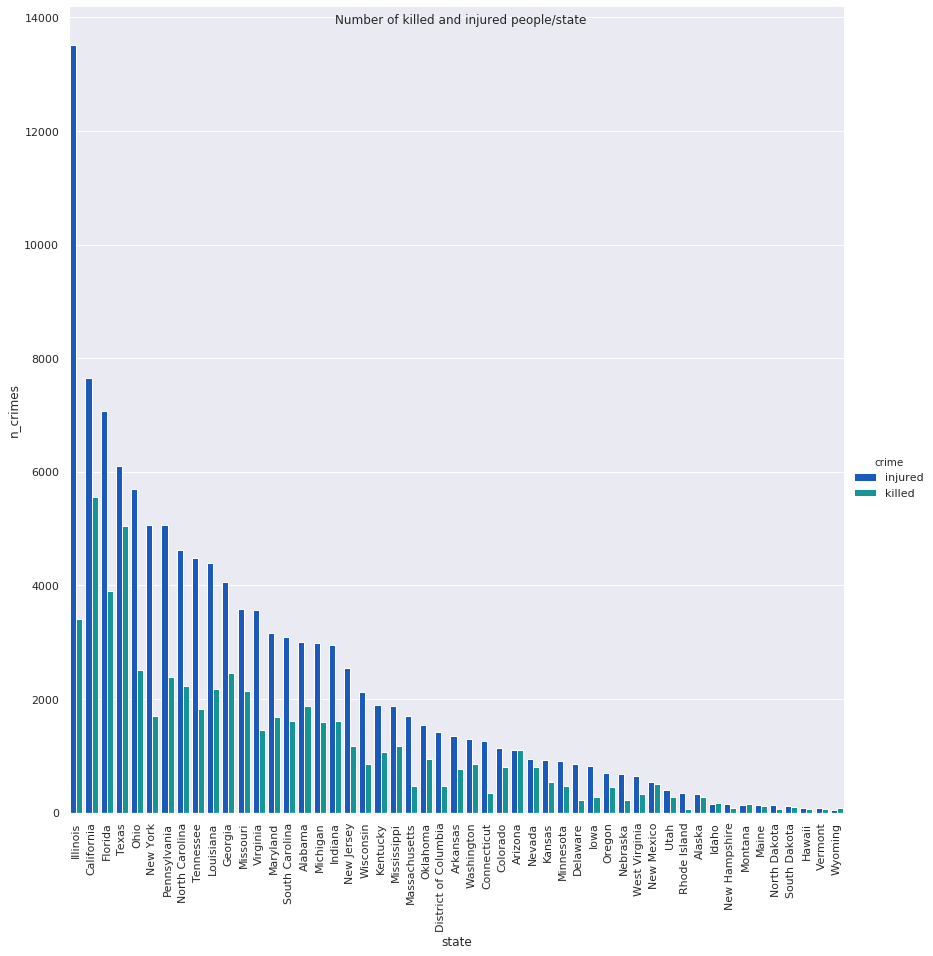

In [39]:
#Graph killed and injured people per state 
graph_1=sns.catplot(x='state',y='n_crimes', hue='crime', kind='bar',data=n_crimes_state, height=12, palette='winter').set_xticklabels(rotation=90)
(graph_1.fig.suptitle('Number of killed and injured people/state'))

In [40]:
#Somando o número de mortos e feridos por cidade no df. 

df_killed_city = df_gun_final.groupby(['city_or_county'])['total_people'].sum().reset_index()
df_killed_city = df_killed_city.sort_values(['total_people'], ascending=False)
#df_killed['n_killed'].sum()
df_killed_city.head()

,city_or_county,total_people
2019,Chicago,12531
530,Baltimore,3482
9018,Philadelphia,3227
10152,Saint Louis,2702
8060,New Orleans,2595


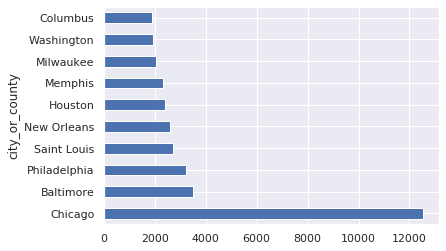

In [41]:
#TOP 10 city most dangerous.

df_killed_city.groupby(['city_or_county'])['total_people'].sum().nlargest(10).plot(kind='barh')

#As cidades mais violentas encontram-se nos estados com maior número de pessoas mortas e machucadas

City       State  
Chicago - Illinois
Baltimore - Maryland
Philadelphia - Pensilvânia
Saint Louis - Missouri
New Orleans - Lousiana


In [44]:
#Explorando dados totais pessoas acometidas por crimes com arma  

groupby_year = df_gun_final.groupby(['year'])['total_people'].sum().reset_index()

groupby_year_sorted = groupby_year.sort_values(['total_people'], ascending = False)
groupby_year_sorted


,year,total_people
4,2017,46214
3,2016,45646
2,2015,40451
1,2014,35559
5,2018,9704
0,2013,1296


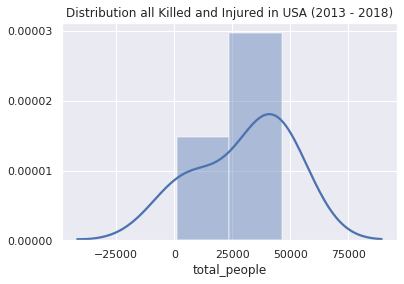

In [45]:
#Fit distribution all crimes during 2013-2018

plt.title('Distribution all Killed and Injured in USA (2013 - 2018)')
sns.set_context('talk')
sns.distplot(groupby_year['total_people'])

plt.show()


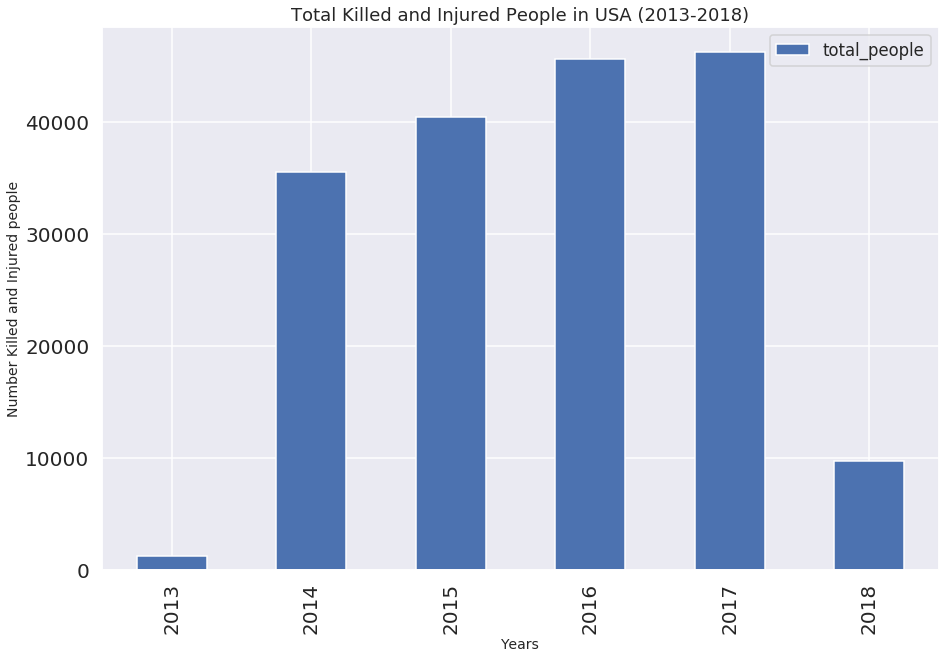

In [46]:
ax = groupby_year[['total_people']].plot(kind='bar', title ="Total Killed and Injured People in USA (2013-2018)", figsize=(15, 10), legend=True, fontsize=20)
ax.set_xlabel("Years", fontsize=14)
ax.set_ylabel("Number Killed and Injured people", fontsize=14)
plt.xticks(groupby_year.index,groupby_year["year"].values)
plt.show()

# ANALYSIS YEAR & MONTHS

In [47]:
#sum of all crimes per year and month   
group_year_month = df_gun_final.groupby(['year', 'month'])['total_people'].sum().reset_index()
group_year_month.head()



,year,month,total_people
0,2013,1,67
1,2013,2,59
2,2013,3,100
3,2013,4,78
4,2013,5,121


In [48]:
#Check zeros in grouped dataframe
group_year_month == 0


,year,month,total_people
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


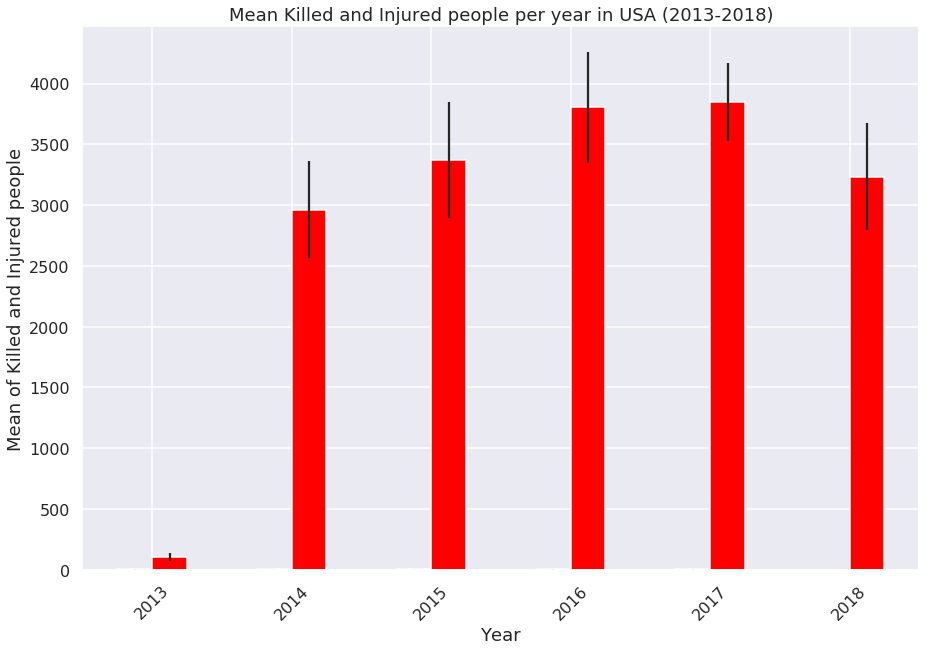

In [50]:
#Plot Mean and std per year
mean_crimes = group_year_month.groupby('year').mean()
std_crimes = group_year_month.groupby('year').std()

mean_std_plot_y = mean_crimes.plot(kind='bar', figsize=(15,10),legend=False,rot=45,color="red",fontsize=16,yerr=std_crimes);
mean_std_plot_y.set_title("Mean Killed and Injured people per year in USA (2013-2018)", fontsize=18);
mean_std_plot_y.set_xlabel("Year", fontsize=18);
mean_std_plot_y.set_ylabel("Mean of Killed and Injured people", fontsize=18);
plt.show()
#We can observe that 2013 and 2018 are "outliers"


In [51]:
#Filtering 2013 and 2018 data - erro metodológico e tamanho amostral diferente, respectivamente
group_y_m_filter = group_year_month[12:60].reset_index()
group_y_m_filter.head()


,index,year,month,total_people
0,12,2014,1,2945
1,13,2014,2,2068
2,14,2014,3,2558
3,15,2014,4,2761
4,16,2014,5,3199


In [52]:
#Testing normality of total killed and injured data
stats.shapiro(group_year_month['total_people']) #not normal as expected


(0.7705092430114746, 1.5148559739941447e-08)

In [53]:
#Testing normality of filtered total killed and injured data
stats.shapiro(group_y_m_filter['total_people']) #normal distribution


(0.9758527874946594, 0.41982579231262207)

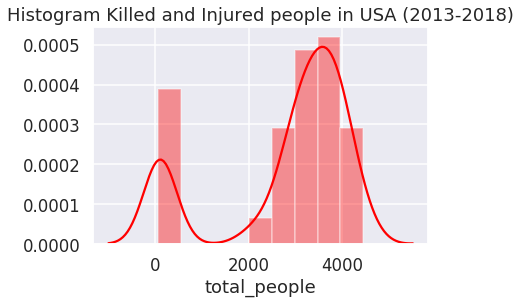

In [54]:
#HISTOGRAM ALL DATA

sns.distplot(group_year_month['total_people'], color='red')
plt.title('Histogram Killed and Injured people in USA (2013-2018)')
plt.show()


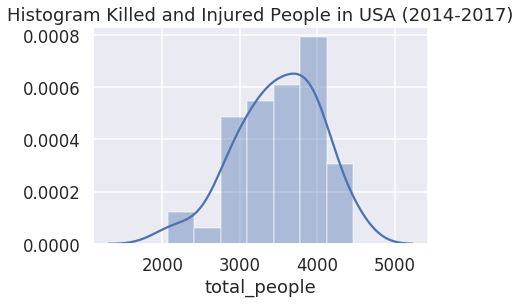

In [55]:
#HISTOGRAM FILTERED DATA
#group_y_m_filter['total_crime'].plot(kind='hist', color='green', figsize=[12,6], legend=True)
plt.title('Histogram Killed and Injured People in USA (2014-2017)')
sns.set_context('talk')
sns.distplot(group_y_m_filter['total_people'])

plt.show()


#qq plot x histogram

O gráfico quantil-quantil (q-q) é uma ferramenta para checar adequação de distribuição de frequência dos dados à uma distribuição de probabilidades. Situações como essa ocorrem principalmente na análise de resíduos de modelos de regressão onde o gráfico q-q é usado para verificar se os resíduos apresentam distribuição normal. O gráfico q-q é melhor que o histograma e o gráfico de distribuição acumulada empírica porque nós temos mais habilidade para verificar se uma reta se ajusta aos pontos do que se uma curva de densidade se ajusta a um histograma ou uma curva de probabilidade acumulada se ajusta à acumulada empírica.


Resíduos = Análise dos Resíduos um conjunto de técnicas utilizadas para investigar a adequabilidade de um modelo de regressão com base nos resíduos. Como visto anteriormente, o resíduo $ (e_i) $ é dado pela diferença entre a variável resposta observada e a variável resposta estimada.


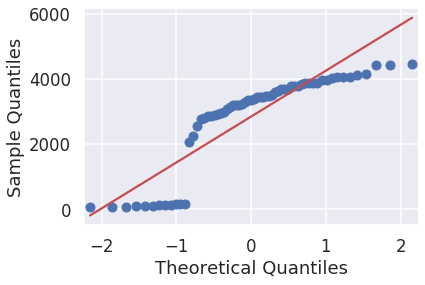

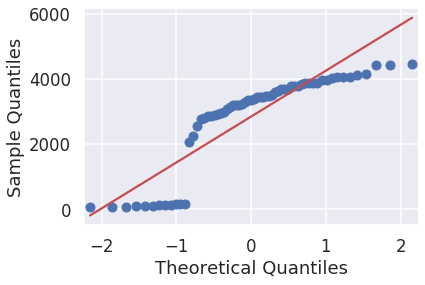

In [56]:
#qqplot non filtered data
sm.qqplot(group_year_month['total_people'], line='s')



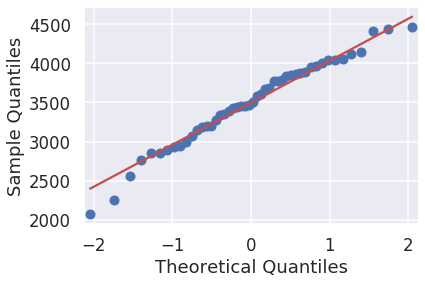

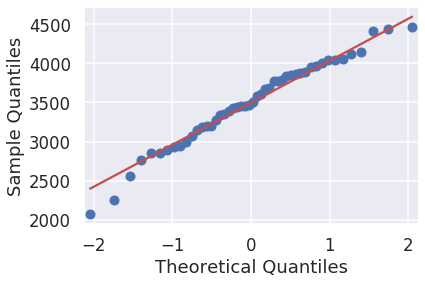

In [57]:
#qqplot filtered data
sm.qqplot(group_y_m_filter['total_people'], line='s')


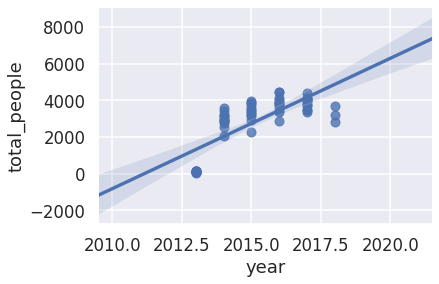

In [58]:
#All Killed and Injured data linear - regression

#Check the types
group_year_month.dtypes
#Change the type of year from object to numeric
group_year_month['year'] = group_year_month['year'].astype(int)
group_year_month.dtypes
#Ploting linear regression without 2018 data
sns.regplot(x="year", y="total_people", data=group_year_month)





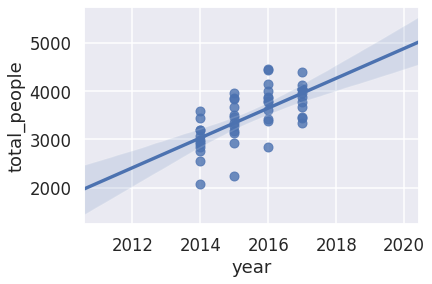

In [59]:
#Filtered 2013 and 2018 Killed and Injured data - linear regression
group_y_m_filter['year'] = group_y_m_filter['year'].astype(int)
sns.regplot(x="year", y="total_people", data=group_y_m_filter)

In [60]:
#Fitting model filtered data 
X = group_y_m_filter['year']
y = group_y_m_filter['total_people']
# Note the difference in argument order
model = sm.OLS(y, X).fit() #OLS stands for Ordinary Least Squares and the method “Least Squares” means that
#we’re trying to fit a regression line that would minimize the square of distance from the regression line
predictions = model.predict(y) # make the predictions by the model
# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_people   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              1997.
Date:                Wed, 07 Aug 2019   Prob (F-statistic):                    3.66e-40
Time:                        09:56:23   Log-Likelihood:                         -369.79
No. Observations:                  48   AIC:                                      741.6
Df Residuals:                      47   BIC:                                      743.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           1.7353      0.039     44.693      0.000       1.657       1.813
==============================================================================
Omnibus:                        2.044   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.671
Skew:                          -0.456   Prob(JB):                        0.434
Kurtosis:                       2.927   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#ALERT!!!!
#Fitting model all data (if you press the button, test will run)
X = group_year_month['year']
y = group_year_month['total_people']
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(y) # make the predictions by the model
# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_people   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                              252.5
Date:                Wed, 07 Aug 2019   Prob (F-statistic):                    1.54e-23
Time:                        09:56:24   Log-Likelihood:                         -546.10
No. Observations:                  63   AIC:                                      1094.
Df Residuals:                      62   BIC:                                      1096.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           1.4093      0.089     15.891      0.000       1.232       1.587
==============================================================================
Omnibus:                       12.304   Durbin-Watson:                   0.131
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.426
Skew:                          -1.171   Prob(JB):                     0.000737
Kurtosis:                       2.887   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

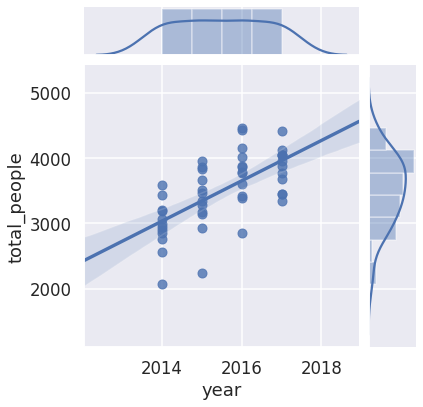

In [62]:
#Ploting linear regression and data distribution filtered data 2013 - 2018
sns.jointplot(x="year", y="total_people", data=group_y_m_filter, kind="reg")


# # MONTHS



In [63]:
#sum of all crimes per year and month   
group_year_month = df_gun_final.groupby(['year', 'month'])['total_people'].sum().reset_index()
group_year_month.head()

# group_year_month_sorted = group_year_month.sort_values(['total_crime'], ascending = False)
# group_year_month_sorted

,year,month,total_people
0,2013,1,67
1,2013,2,59
2,2013,3,100
3,2013,4,78
4,2013,5,121


In [64]:
#Months with more Killed and Injured people without 2013 and 2018
df_month_max = group_year_month.loc[group_year_month.groupby(['year'])['total_people'].idxmax()]
x = df_month_max.reset_index()

#Excluding 2013 and 2018
df_month_filter = x[1:5]
df_month_filter


,index,year,month,total_people
1,18,2014,7,3585
2,30,2015,7,3962
3,43,2016,8,4461
4,54,2017,7,4409


In [65]:
#We observed 2013 and 2018 are outliers and incomplete data
#Filtering the complete dataframe 2013 and 2018!!!!!!!!!

df_no13_no18 = df_gun_final[(df_gun_final.year != '2013') & (df_gun_final.year != '2018')]
df_no13_no18


/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,date,state,city_or_county,n_killed,n_injured,total_people,gun_type,incident_characteristics,participant_age,participant_gender,participant_status,participant_type,year,month
0,2013-01-01,Pennsylvania,Mckeesport,0,4,4,NaN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,0::20,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1
1,2013-01-01,California,Hawthorne,1,3,4,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::20,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1
2,2013-01-01,Ohio,Lorain,1,3,4,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,2013,1
3,2013-01-05,Colorado,Aurora,4,0,4,NaN,"Shot - Dead (murder, accidental, suicide)||Off...",0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,1
4,2013-01-07,North Carolina,Greensboro,2,2,4,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,2013,1
5,2013-01-07,Oklahoma,Tulsa,4,0,4,NaN,"Shot - Dead (murder, accidental, suicide)||Hom...",0::23||1::23||2::33||3::55,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1
6,2013-01-19,New Mexico,Albuquerque,5,0,5,0::22 LR||1::223 Rem [AR-15],"Shot - Dead (murder, accidental, suicide)||Mas...",0::51||1::40||2::9||3::5||4::2||5::15,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1
7,2013-01-21,Louisiana,New Orleans,0,5,5,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1
8,2013-01-21,California,Brentwood,0,4,4,NaN,Shot - Wounded/Injured||Drive-by (car to stree...,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1
9,2013-01-23,Maryland,Baltimore,1,6,7,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",0::15,0::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,2013,1


In [66]:
#Sum Killed and Injured data per month without 2013 and 2018

group_month_filtered = df_no13_no18.groupby(['month'])['total_people'].sum().reset_index()
group_month_filtered


,month,total_people
0,1,16981
1,2,13365
2,3,16116
3,4,13290
4,5,15074
5,6,14683
6,7,16535
7,8,15936
8,9,14545
9,10,14547


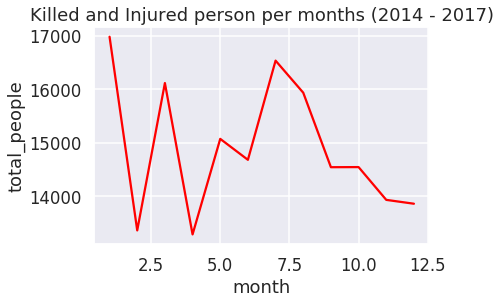

In [67]:
#Killed and Injured data per month

plt.title('Killed and Injured person per months (2014 - 2017)')
sns.set_style('ticks')
sns.set_context('talk')
sns.lineplot(x="month", y="total_people", color='red', data=group_month_filtered)



# STATES


In [68]:
group_year_state = df_gun_final.groupby(['state'])['total_people'].sum().reset_index()
df_sorted_state = group_year_state.sort_values(['total_people'], ascending = False)
df_sorted_state


,state,total_people
13,Illinois,16923
4,California,13206
43,Texas,11152
9,Florida,10981
35,Ohio,8211
38,Pennsylvania,7451
33,North Carolina,6854
32,New York,6764
18,Louisiana,6577
10,Georgia,6512


In [69]:
#Calculating total number of crimes
total_crime_values = group_year_state['total_people'].sum()
total_crime_values


178870

In [70]:
#Calculating the percentage of killed and injured people per state englobing sum of all years (2014-2017)
df_sorted_state['perc'] = df_sorted_state['total_people']/178870
df_perc_sorted = df_sorted_state.reset_index()
df_perc_sorted['perc_100'] = df_perc_sorted['perc']*100
df_perc_sorted.head()


,index,state,total_people,perc,perc_100
0,13,Illinois,16923,0.094611,9.461061
1,4,California,13206,0.073830,7.383016
2,43,Texas,11152,0.062347,6.234696
3,9,Florida,10981,0.061391,6.139095
4,35,Ohio,8211,0.045905,4.590485


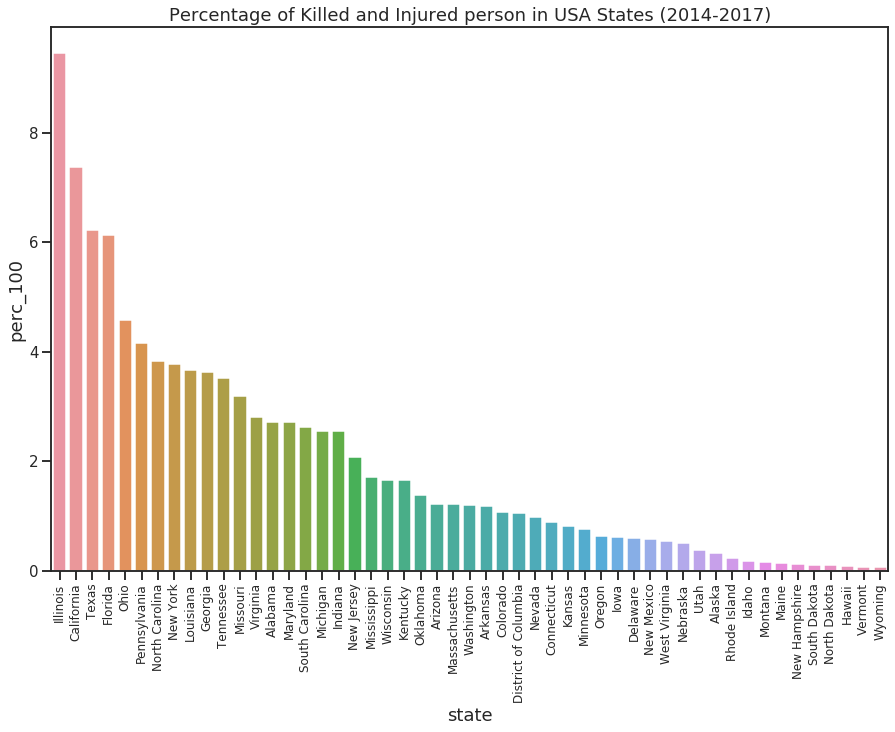

In [71]:
#Plot percentage of Killed and Injured data (2014-2017) per state
plt.figure(figsize=(15,10))
plt.title('Percentage of Killed and Injured person in USA States (2014-2017)')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=15)

sns.barplot(x='state', y='perc_100', data=df_perc_sorted)

plt.show()


In [72]:
#Creating lists of Top 10 states most dangerous per year

group_y_s_venn = df_gun_final.groupby(['year', 'state'])['total_people'].sum().reset_index()


df_2014_top10 = group_y_s_venn[group_y_s_venn['year'].astype('str').str.contains("2014")].nlargest(10, 'total_people')
list_state_2014 = df_2014_top10.reset_index()
list_state_2014

df_2015_top10 = group_y_s_venn[group_y_s_venn['year'].astype('str').str.contains("2015")].nlargest(10, 'total_people')
list_state_2015 = df_2015_top10.reset_index()
list_state_2015

df_2016_top10 = group_y_s_venn[group_y_s_venn['year'].astype('str').str.contains("2016")].nlargest(10, 'total_people')
list_state_2016 = df_2016_top10.reset_index()
list_state_2016

df_2017_top10 = group_y_s_venn[group_y_s_venn['year'].astype('str').str.contains("2017")].nlargest(10, 'total_people')
list_state_2017 = df_2017_top10.reset_index()
list_state_2017



,index,year,state,total_people
0,203,2017,Illinois,4588
1,194,2017,California,3376
2,199,2017,Florida,2751
3,233,2017,Texas,2734
4,225,2017,Ohio,2217
5,228,2017,Pennsylvania,1823
6,208,2017,Louisiana,1733
7,200,2017,Georgia,1715
8,223,2017,North Carolina,1709
9,232,2017,Tennessee,1693


In [73]:
#Add all top 10 state with more Killed and Injured data per year to unique list
list_of_years_states = [list_state_2014, list_state_2015, list_state_2016, list_state_2017]
list_of_years_states

[   index  year           state  total_people
 0     41  2014      California          2927
 1     50  2014        Illinois          2913
 2     46  2014         Florida          2336
 3     80  2014           Texas          2251
 4     75  2014    Pennsylvania          1835
 5     72  2014            Ohio          1614
 6     55  2014       Louisiana          1386
 7     70  2014  North Carolina          1371
 8     69  2014        New York          1362
 9     47  2014         Georgia          1339,
    index  year           state  total_people
 0    101  2015        Illinois          3510
 1     92  2015      California          2821
 2    131  2015           Texas          2491
 3     97  2015         Florida          2343
 4    120  2015        New York          1984
 5    123  2015            Ohio          1841
 6     98  2015         Georgia          1691
 7    121  2015  North Carolina          1589
 8    126  2015    Pennsylvania          1572
 9    130  2015       Tennessee  

In [175]:
#Creating a merged data frame of top 10 states with most Killed and Injured people

def intersect_recursive(list_of_years_states, how):
    
    if len(list_of_years_states) == 1:
        return list_of_years_states[0]
    
    else:
        head = list_of_years_states[0]
        smaller_list = list_of_years_states[1:]
        return pd.merge(head, intersect_recursive(smaller_list, how), how=how, on=['state'])


df_state_merge = intersect_recursive(list_of_years_states, 'outer')
df_state_merge

,index_x,year_x,state,total_people_x,index_y,year_y,total_people_y,index_x,year_x,total_people_x,index_y,year_y,total_people_y
0,41.0,2014.0,California,2927.0,92.0,2015.0,2821.0,143.0,2016.0,3161.0,194.0,2017.0,3376.0
1,50.0,2014.0,Illinois,2913.0,101.0,2015.0,3510.0,152.0,2016.0,5083.0,203.0,2017.0,4588.0
2,46.0,2014.0,Florida,2336.0,97.0,2015.0,2343.0,148.0,2016.0,2847.0,199.0,2017.0,2751.0
3,80.0,2014.0,Texas,2251.0,131.0,2015.0,2491.0,182.0,2016.0,2927.0,233.0,2017.0,2734.0
4,75.0,2014.0,Pennsylvania,1835.0,126.0,2015.0,1572.0,177.0,2016.0,1776.0,228.0,2017.0,1823.0
5,72.0,2014.0,Ohio,1614.0,123.0,2015.0,1841.0,174.0,2016.0,2083.0,225.0,2017.0,2217.0
6,55.0,2014.0,Louisiana,1386.0,NaN,NaN,NaN,157.0,2016.0,1630.0,208.0,2017.0,1733.0
7,70.0,2014.0,North Carolina,1371.0,121.0,2015.0,1589.0,172.0,2016.0,1781.0,223.0,2017.0,1709.0
8,69.0,2014.0,New York,1362.0,120.0,2015.0,1984.0,171.0,2016.0,1691.0,NaN,NaN,NaN
9,47.0,2014.0,Georgia,1339.0,98.0,2015.0,1691.0,NaN,NaN,NaN,200.0,2017.0,1715.0


In [176]:
#Rename columns state merge

df_state_merge.columns = ['index_2014','year_2014','state',
                     'total_crime_14','index_2015', 'year_2015',
                     'total_crime_15', 'index_2016','year_2016',
                     'total_crime_16', 'index_2017','year_2017',
                     'total_crime_17']

df_state_merge


,index_2014,year_2014,state,total_crime_14,index_2015,year_2015,total_crime_15,index_2016,year_2016,total_crime_16,index_2017,year_2017,total_crime_17
0,41.0,2014.0,California,2927.0,92.0,2015.0,2821.0,143.0,2016.0,3161.0,194.0,2017.0,3376.0
1,50.0,2014.0,Illinois,2913.0,101.0,2015.0,3510.0,152.0,2016.0,5083.0,203.0,2017.0,4588.0
2,46.0,2014.0,Florida,2336.0,97.0,2015.0,2343.0,148.0,2016.0,2847.0,199.0,2017.0,2751.0
3,80.0,2014.0,Texas,2251.0,131.0,2015.0,2491.0,182.0,2016.0,2927.0,233.0,2017.0,2734.0
4,75.0,2014.0,Pennsylvania,1835.0,126.0,2015.0,1572.0,177.0,2016.0,1776.0,228.0,2017.0,1823.0
5,72.0,2014.0,Ohio,1614.0,123.0,2015.0,1841.0,174.0,2016.0,2083.0,225.0,2017.0,2217.0
6,55.0,2014.0,Louisiana,1386.0,NaN,NaN,NaN,157.0,2016.0,1630.0,208.0,2017.0,1733.0
7,70.0,2014.0,North Carolina,1371.0,121.0,2015.0,1589.0,172.0,2016.0,1781.0,223.0,2017.0,1709.0
8,69.0,2014.0,New York,1362.0,120.0,2015.0,1984.0,171.0,2016.0,1691.0,NaN,NaN,NaN
9,47.0,2014.0,Georgia,1339.0,98.0,2015.0,1691.0,NaN,NaN,NaN,200.0,2017.0,1715.0


In [76]:
#list_of_years_states

In [77]:
#Data of state to list

list_state_2014['state'].values.tolist()
list_state_2015['state'].values.tolist()
list_state_2016['state'].values.tolist()
list_state_2017['state'].values.tolist()



['Illinois',
 'California',
 'Florida',
 'Texas',
 'Ohio',
 'Pennsylvania',
 'Louisiana',
 'Georgia',
 'North Carolina',
 'Tennessee']

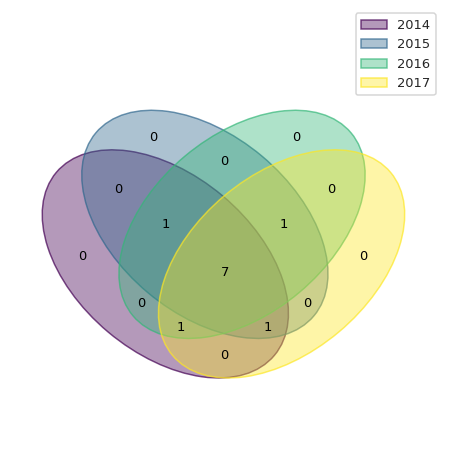

In [78]:
#venn top 10 most dangerous states in USA

from venn import venn
%matplotlib inline


states = {
    "2014": {'California',
 'Illinois',
 'Florida',
 'Texas',
 'Pennsylvania',
 'Ohio',
 'Louisiana',
 'North Carolina',
 'New York',
 'Georgia'},
    "2015": {'Illinois',
 'California',
 'Texas',
 'Florida',
 'New York',
 'Ohio',
 'Georgia',
 'North Carolina',
 'Pennsylvania',
 'Tennessee'},
    "2016": {'Illinois',
 'California',
 'Texas',
 'Florida',
 'Ohio',
 'North Carolina',
 'Pennsylvania',
 'New York',
 'Tennessee',
 'Louisiana'},
    "2017": {'Illinois',
 'California',
 'Florida',
 'Texas',
 'Ohio',
 'Pennsylvania',
 'Louisiana',
 'Georgia',
 'North Carolina',
 'Tennessee'}
}

venn(states)

In [79]:
#Sorting to obtain the top 10 states with lower Killed and Injured data

In [80]:
#Creating lists of Top 10 states lowest dangerous per year CHANGE TO TOP LOWER

group_y_s_venn = df_gun_final.groupby(['year', 'state'])['total_people'].sum().reset_index()


df_2014_top10_lower = group_y_s_venn[group_y_s_venn['year'].astype('str').str.contains("2014")].nsmallest(10, 'total_people')
list_state_2014_lower = df_2014_top10_lower.reset_index()
list_state_2014_lower

df_2015_top10_lower = group_y_s_venn[group_y_s_venn['year'].astype('str').str.contains("2015")].nsmallest(10, 'total_people')
list_state_2015_lower = df_2015_top10_lower.reset_index()
list_state_2015_lower

df_2016_top10_lower = group_y_s_venn[group_y_s_venn['year'].astype('str').str.contains("2016")].nsmallest(10, 'total_people')
list_state_2016_lower = df_2016_top10_lower.reset_index()
list_state_2016_lower

df_2017_top10_lower = group_y_s_venn[group_y_s_venn['year'].astype('str').str.contains("2017")].nsmallest(10, 'total_people')
list_state_2017_lower = df_2017_top10_lower.reset_index()
list_state_2017_lower



,index,year,state,total_people
0,235,2017,Vermont,20
1,240,2017,Wyoming,22
2,201,2017,Hawaii,28
3,231,2017,South Dakota,40
4,224,2017,North Dakota,48
5,219,2017,New Hampshire,53
6,209,2017,Maine,69
7,216,2017,Montana,74
8,202,2017,Idaho,81
9,229,2017,Rhode Island,90


In [81]:
list_of_years_states_lower = [list_state_2014_lower, list_state_2015_lower, list_state_2016_lower, list_state_2017_lower]

In [82]:
#Creating a merged data frame of top 10 states with most Killed and Injured people

def intersect_recursive(list_of_years_states_lower, how):
    
    if len(list_of_years_states_lower) == 1:
        return list_of_years_states_lower[0]
    
    else:
        head = list_of_years_states_lower[0]
        smaller_list = list_of_years_states_lower[1:]
        return pd.merge(head, intersect_recursive(smaller_list, how), how=how, on=['state'])


df_state_merge_lower = intersect_recursive(list_of_years_states_lower, 'outer')
df_state_merge_lower

,index_x,year_x,state,total_people_x,index_y,year_y,total_people_y,index_x,year_x,total_people_x,index_y,year_y,total_people_y
0,48.0,2014.0,Hawaii,21.0,99.0,2015.0,39.0,150.0,2016.0,51.0,201.0,2017.0,28.0
1,87.0,2014.0,Wyoming,27.0,138.0,2015.0,36.0,189.0,2016.0,30.0,240.0,2017.0,22.0
2,78.0,2014.0,South Dakota,36.0,129.0,2015.0,53.0,180.0,2016.0,55.0,231.0,2017.0,40.0
3,71.0,2014.0,North Dakota,39.0,122.0,2015.0,51.0,173.0,2016.0,51.0,224.0,2017.0,48.0
4,56.0,2014.0,Maine,47.0,107.0,2015.0,62.0,158.0,2016.0,55.0,209.0,2017.0,69.0
5,82.0,2014.0,Vermont,47.0,133.0,2015.0,33.0,184.0,2016.0,23.0,235.0,2017.0,20.0
6,49.0,2014.0,Idaho,57.0,100.0,2015.0,76.0,151.0,2016.0,78.0,202.0,2017.0,81.0
7,66.0,2014.0,New Hampshire,60.0,117.0,2015.0,48.0,168.0,2016.0,60.0,219.0,2017.0,53.0
8,63.0,2014.0,Montana,62.0,114.0,2015.0,72.0,165.0,2016.0,64.0,216.0,2017.0,74.0
9,38.0,2014.0,Alaska,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df_state_merge_lower.columns = ['index_2014','year_2014','state',
                     'total_crime_14','index_2015', 'year_2015',
                     'total_crime_15', 'index_2016','year_2016',
                     'total_crime_16', 'index_2017','year_2017',
                     'total_crime_17']

df_state_merge_lower

,index_2014,year_2014,state,total_crime_14,index_2015,year_2015,total_crime_15,index_2016,year_2016,total_crime_16,index_2017,year_2017,total_crime_17
0,48.0,2014.0,Hawaii,21.0,99.0,2015.0,39.0,150.0,2016.0,51.0,201.0,2017.0,28.0
1,87.0,2014.0,Wyoming,27.0,138.0,2015.0,36.0,189.0,2016.0,30.0,240.0,2017.0,22.0
2,78.0,2014.0,South Dakota,36.0,129.0,2015.0,53.0,180.0,2016.0,55.0,231.0,2017.0,40.0
3,71.0,2014.0,North Dakota,39.0,122.0,2015.0,51.0,173.0,2016.0,51.0,224.0,2017.0,48.0
4,56.0,2014.0,Maine,47.0,107.0,2015.0,62.0,158.0,2016.0,55.0,209.0,2017.0,69.0
5,82.0,2014.0,Vermont,47.0,133.0,2015.0,33.0,184.0,2016.0,23.0,235.0,2017.0,20.0
6,49.0,2014.0,Idaho,57.0,100.0,2015.0,76.0,151.0,2016.0,78.0,202.0,2017.0,81.0
7,66.0,2014.0,New Hampshire,60.0,117.0,2015.0,48.0,168.0,2016.0,60.0,219.0,2017.0,53.0
8,63.0,2014.0,Montana,62.0,114.0,2015.0,72.0,165.0,2016.0,64.0,216.0,2017.0,74.0
9,38.0,2014.0,Alaska,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#Convert column in list top 10 lowest dangerous states in USA

list_state_2014_lower['state'].values.tolist()
list_state_2015_lower['state'].values.tolist()
list_state_2016_lower['state'].values.tolist()
list_state_2017_lower['state'].values.tolist()

['Vermont',
 'Wyoming',
 'Hawaii',
 'South Dakota',
 'North Dakota',
 'New Hampshire',
 'Maine',
 'Montana',
 'Idaho',
 'Rhode Island']

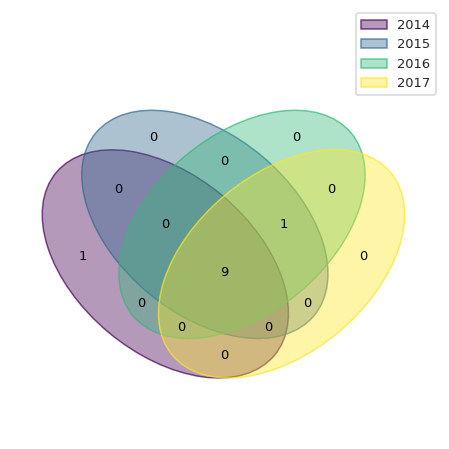

In [85]:
#venn top 10 most dangerous states in USA

from venn import venn
%matplotlib inline

states = {
    "2014": {'Hawaii',
 'Wyoming',
 'South Dakota',
 'North Dakota',
 'Maine',
 'Vermont',
 'Idaho',
 'New Hampshire',
 'Montana',
 'Alaska'},
    "2015": {'Vermont',
 'Wyoming',
 'Hawaii',
 'New Hampshire',
 'North Dakota',
 'South Dakota',
 'Maine',
 'Montana',
 'Idaho',
 'Rhode Island'},
    "2016": {'Vermont',
 'Wyoming',
 'Hawaii',
 'North Dakota',
 'Maine',
 'South Dakota',
 'New Hampshire',
 'Montana',
 'Idaho',
 'Rhode Island'},
    "2017": {'Vermont',
 'Wyoming',
 'Hawaii',
 'South Dakota',
 'North Dakota',
 'New Hampshire',
 'Maine',
 'Montana',
 'Idaho',
 'Rhode Island'}
}

venn(states)



In [86]:
#Variação percentual de vítimas por ano e por estado
#Filtrando os anos

df_gviol = groupby_year[(groupby_year["year"] > 2013) & (groupby_year["year"] < 2018)]
df_gviol.head()

,year,total_people
1,2014,35559
2,2015,40451
3,2016,45646
4,2017,46214


In [87]:
# Calculando mudança percentual do 'total de pessoas' em relação ao ano anterior

df_gviol['Percentage change'] = df_gviol["total_people"].pct_change()*100
df_pct_year = df_gviol.loc[df_gviol["year"] > 2014]
df_pct_year.replace([2015, 2016, 2017], ["2014-2015", "2015-2016","2016-2017"], inplace=True)
df_pct_year.rename(columns={'year': 'Interval'}, inplace=True)
df_pct_year.head()

/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/home/gabi/frosi_area_trabalho/Downloads/home/gabi/frosi_area_trabalho/envs/curso/lib/python3.6/site-packages/pandas/core/frame.py:4025: Setting

,Interval,total_people,Percentage change
2,2014-2015,40451,13.757417
3,2015-2016,45646,12.842699
4,2016-2017,46214,1.244359


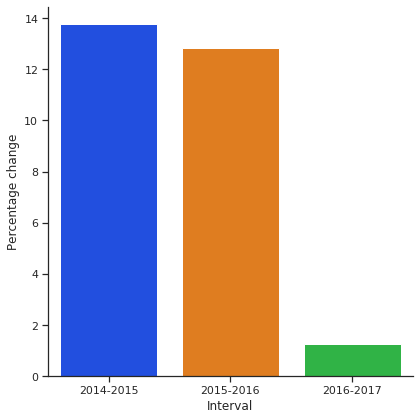

In [88]:
#PLotando o gŕafico das variações percentuais do total de pessoas por ano

sns.set_context("notebook")
test_group = sns.catplot(x="Interval", y="Percentage change", data=df_pct_year,
                height=6, kind="bar", palette="bright")

In [89]:

groupby_st_year = df_gun_final.groupby(['state', 'year'])['total_people'].sum().reset_index()
groupby_st_year.head()

,state,year,total_people
0,Alabama,2013,12
1,Alabama,2014,916
2,Alabama,2015,947
3,Alabama,2016,1249
4,Alabama,2017,1400


In [90]:
#Calculando a porcentagem de pessoas mortas e feridas para cada estado em cada ano 
groupby_st_year['Percentage Change'] = groupby_st_year.groupby('state')['total_people'].pct_change()*100
groupby_st_year

,state,year,total_people,Percentage Change
0,Alabama,2013,12,NaN
1,Alabama,2014,916,7533.333333
2,Alabama,2015,947,3.384279
3,Alabama,2016,1249,31.890180
4,Alabama,2017,1400,12.089672
5,Alabama,2018,354,-74.714286
6,Alaska,2014,78,NaN
7,Alaska,2015,154,97.435897
8,Alaska,2016,191,24.025974
9,Alaska,2017,139,-27.225131


In [91]:
#Removendo linhas que possuem o ano 2014


groupby_st_year["year"].astype(int, inplace=True)
df_st_year_pct = groupby_st_year.loc[(groupby_st_year["year"] > 2014) & (groupby_st_year["year"] < 2018)]
df_st_year_pct.head()

,state,year,total_people,Percentage Change
2,Alabama,2015,947,3.384279
3,Alabama,2016,1249,31.890180
4,Alabama,2017,1400,12.089672
7,Alaska,2015,154,97.435897
8,Alaska,2016,191,24.025974


In [92]:
#ALterando as classes dos valores: anos(2015) para intervalos(2014-2015)

df_st_year_pct.replace([2015, 2016, 2017], ["2014-2015", "2015-2016","2016-2017"], inplace=True)

In [93]:
#Renomeando a coluna year para interval

df_st_year_pct.rename(columns={'year': 'Interval'}, inplace=True)
df_st_year_pct.head()

,state,Interval,total_people,Percentage Change
2,Alabama,2014-2015,947,3.384279
3,Alabama,2015-2016,1249,31.890180
4,Alabama,2016-2017,1400,12.089672
7,Alaska,2014-2015,154,97.435897
8,Alaska,2015-2016,191,24.025974


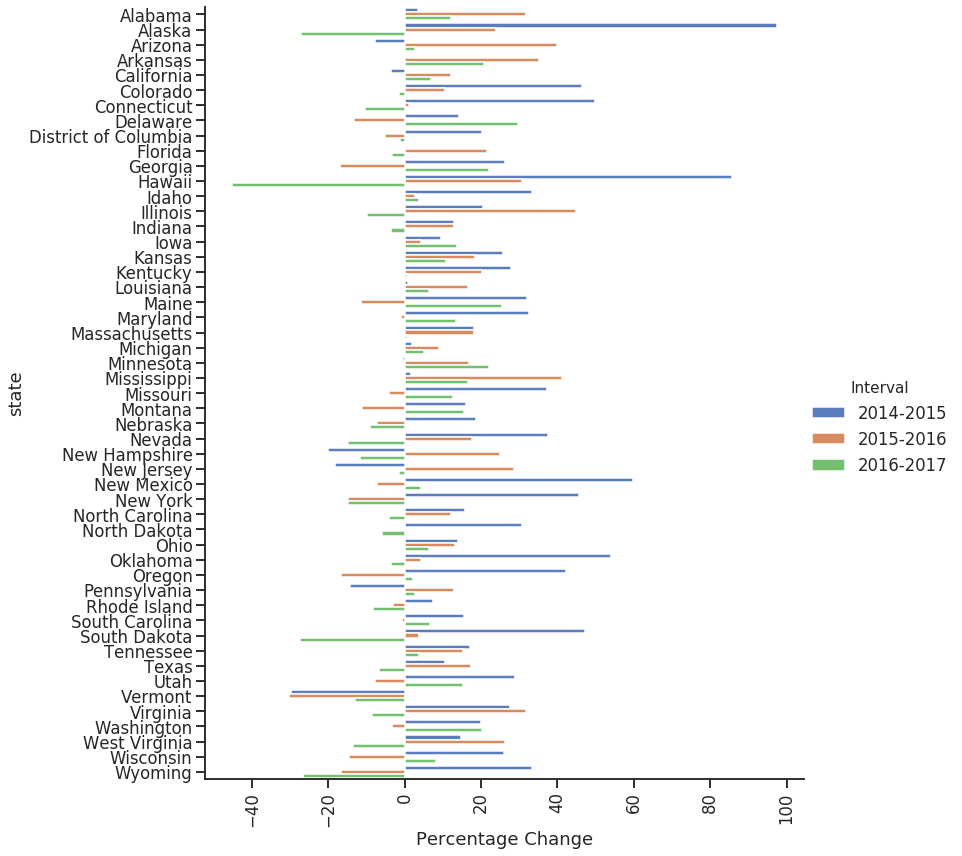

In [94]:
#PLotando o gŕafico das variações percentuais dos crimes dos estados por ano

sns.set_context("talk")
test_group = sns.catplot(y="state", x="Percentage Change", hue="Interval", data=df_st_year_pct,
                height=12, kind="bar", palette="muted")
test_group.set_xticklabels(rotation=90)

Example:
Gun laws in Hawaii regulate the sale, possession, and use of firearms and ammunition in the state of Hawaii, United States. Hawaii's gun laws are among the most restrictive in the country. 

Permit Applications Processed, Issued, Voided, and Denied:
A  total  of  16,443  personal/private  firearm  permit  applications  were  processed  statewide  during  2017,  marking a 23.2% decrease from 21,408 applications processed in 2016.


In [95]:
# Importando dados adicionais  

unemployment = pd.read_csv ('/home/gabi/unemployment.csv', index_col = ['region'], header=0, sep=',')
unemployment.drop(unemployment.head(1).index, inplace=True)
unemployment.head()

,unemp_2013,unemp_2014,unemp_2015,unemp_2016,unemp_2017,unemp_2018
region,,,,,,
Alabama,7.2,6.8,6.1,5.8,4.4,3.9
Alaska,7.0,6.9,6.5,6.9,7.0,6.6
Arizona,7.7,6.8,6.1,5.4,4.9,4.8
Arkansas,7.2,6.0,5.0,4.0,3.7,3.7
California,8.9,7.5,6.2,5.5,4.8,4.2


In [119]:
#Guns2017
guns2017 = pd.read_csv ('/home/gabi/guns2017.csv', index_col = ['region'], header=0, sep=',')
guns2017.head()

,guns_2017
region,
Alabama,161641
Alaska,15824
Arkansas,79841
Arizona,179738
California,344622


In [97]:
#population
population = pd.read_csv ('/home/gabi/population.csv', index_col = ['region'], header=0, sep=',')
population.head()

,census,pop_2014,pop_2015,pop_2016,pop_2017
region,,,,,
Alabama,4779736,4842481,4853160,4864745,4875120
Alaska,710231,736307,737547,741504,739786
Arizona,6392017,6733840,6833596,6945452,7048876
Arkansas,2915918,2967726,2978407,2990410,3002997
California,37253956,38625139,38953142,39209127,39399349


In [98]:
#Compilando os dados de CRIMES por ano e TOTAL de crimes de 2014-2017 em um novo dataframe 
df_state = pd.DataFrame()
df_state['crimes_2014'] = df_gun_final[df_gun_final['date'].str.contains('2014')].groupby('state')['state'].count()
df_state['crimes_2015'] = df_gun_final[df_gun_final['date'].str.contains('2015')].groupby('state')['state'].count()
df_state['crimes_2016'] = df_gun_final[df_gun_final['date'].str.contains('2016')].groupby('state')['state'].count()
df_state['crimes_2017'] = df_gun_final[df_gun_final['date'].str.contains('2017')].groupby('state')['state'].count()
df_state['crimes_total'] = df_state['crimes_2014']+df_state['crimes_2015']+df_state['crimes_2016']+df_state['crimes_2017']
df_state.head()

,crimes_2014,crimes_2015,crimes_2016,crimes_2017,crimes_total
state,,,,,
Alabama,1318,1034,1309,1461,5122
Alaska,146,380,445,317,1288
Arizona,556,480,554,587,2177
Arkansas,572,538,720,820,2650
California,3732,3234,3617,4588,15171


In [99]:
#Compilando os dados de crimes agrupados por Estado por ano e TOTAL de crimes de 2014-2017 em um novo dataframe 
df_state['people_2014'] = df_gun_final[df_gun_final['date'].str.contains('2014')].groupby('state')['total_people'].sum()
df_state['people_2015'] = df_gun_final[df_gun_final['date'].str.contains('2015')].groupby('state')['total_people'].sum()
df_state['people_2016'] = df_gun_final[df_gun_final['date'].str.contains('2016')].groupby('state')['total_people'].sum()
df_state['people_2017'] = df_gun_final[df_gun_final['date'].str.contains('2017')].groupby('state')['total_people'].sum()
df_state['people_total'] = df_state['people_2014']+df_state['people_2015']+df_state['people_2016']+df_state['people_2017']
df_state.head()

,crimes_2014,crimes_2015,crimes_2016,crimes_2017,crimes_total,people_2014,people_2015,people_2016,people_2017,people_total
state,,,,,,,,,,
Alabama,1318,1034,1309,1461,5122,916,947,1249,1400,4512
Alaska,146,380,445,317,1288,78,154,191,139,562
Arizona,556,480,554,587,2177,442,408,571,587,2008
Arkansas,572,538,720,820,2650,400,400,541,653,1994
California,3732,3234,3617,4588,15171,2927,2821,3161,3376,12285


In [100]:
#2014 data - information about index of population 
gdl2014 = pd.read_csv('/home/gabi/2014.csv', index_col = ['Region'], header=0, sep=',')
gdl2014 = gdl2014.drop(['Country', 'ISO_Code', 'Level', 'GDLCODE'], axis=1)
gdl2014.rename(index=str, columns={"Sub-national HDI": "HDI", "Health index": "Health", "Income index": "Income", "Educational index ": "Educational"}, inplace=True)
gdl2014['unemp'] = unemployment['unemp_2014']
gdl2014['pop'] = population['pop_2014']
gdl2014['crimes'] = df_state['crimes_2014']
cols = gdl2014.columns.tolist()
cols = cols[-1:] + cols[:-1]
gdl2014 = gdl2014[cols] 
gdl2014['crimes-per100k'] = (gdl2014['crimes']/gdl2014['pop'])*100000
gdl2014.head()

,crimes,HDI,Health,Income,Educational,unemp,pop,crimes-per100k
Region,,,,,,,,
Alabama,1318,0.876,0.855,0.902,0.872,6.8,4842481,27.217453
Alaska,146,0.939,0.900,0.994,0.926,6.9,736307,19.828686
Arizona,556,0.907,0.920,0.909,0.893,6.8,6733840,8.256804
Arkansas,572,0.877,0.865,0.900,0.866,6.0,2967726,19.274017
California,3732,0.926,0.938,0.965,0.878,7.5,38625139,9.662101


In [101]:
#2015 data (testing without year description)
gdl2015 = pd.read_csv('/home/gabi/2015.csv', index_col = ['Region'], header=0, sep=',')
gdl2015 = gdl2015.drop(['Country', 'ISO_Code', 'Level', 'GDLCODE'], axis=1)
gdl2015.rename(index=str, columns={"Sub-national HDI": "HDI", "Health index": "Health", "Income index": "Income", "Educational index ": "Educational"}, inplace=True)
gdl2015['unemp'] = unemployment['unemp_2015']
gdl2015['pop'] = population['pop_2015']
gdl2015['crimes'] = df_state['crimes_2015']
cols = gdl2015.columns.tolist()
cols = cols[-1:] + cols[:-1]
gdl2015 = gdl2015[cols] 
gdl2015['crimes-per100k'] = (gdl2015['crimes']/gdl2015['pop'])*100000
gdl2015.head()

,crimes,HDI,Health,Income,Educational,unemp,pop,crimes-per100k
Region,,,,,,,,
Alabama,1034,0.878,0.857,0.903,0.874,6.1,4853160,21.305706
Alaska,380,0.941,0.902,0.995,0.929,6.5,737547,51.522140
Arizona,480,0.909,0.922,0.909,0.896,6.1,6833596,7.024120
Arkansas,538,0.878,0.866,0.900,0.868,5.0,2978407,18.063347
California,3234,0.930,0.940,0.970,0.881,6.2,38953142,8.302283


In [102]:
#2016 data
gdl2016 = pd.read_csv('/home/gabi/2016.csv', index_col = ['Region'], header=0, sep=',')
gdl2016 = gdl2016.drop(['Country', 'ISO_Code', 'Level', 'GDLCODE'], axis=1)
gdl2016.rename(index=str, columns={"Sub-national HDI": "HDI", "Health index": "Health", "Income index": "Income", "Educational index ": "Educational"}, inplace=True)
gdl2016['unemp'] = unemployment['unemp_2016']
gdl2016['pop'] = population['pop_2016']
gdl2016['crimes'] = df_state['crimes_2016']
cols = gdl2016.columns.tolist()
cols = cols[-1:] + cols[:-1]
gdl2016 = gdl2016[cols] 
gdl2016['crimes-per100k'] = (gdl2016['crimes']/gdl2016['pop'])*100000
gdl2016.head()

,crimes,HDI,Health,Income,Educational,unemp,pop,crimes-per100k
Region,,,,,,,,
Alabama,1309,0.880,0.860,0.904,0.878,5.8,4864745,26.907885
Alaska,445,0.940,0.905,0.986,0.932,6.9,741504,60.013162
Arizona,554,0.911,0.925,0.910,0.899,5.4,6945452,7.976443
Arkansas,720,0.881,0.869,0.901,0.872,4.0,2990410,24.076966
California,3617,0.933,0.943,0.973,0.884,5.5,39209127,9.224893


In [103]:
#2017 data
gdl2017 = pd.read_csv('/home/gabi/2017.csv', index_col = ['Region'], header=0, sep=',')
gdl2017 = gdl2017.drop(['Country', 'ISO_Code', 'Level', 'GDLCODE'], axis=1)
gdl2017.rename(index=str, columns={"Sub-national HDI": "HDI", "Health index": "Health", "Income index": "Income", "Educational index ": "Educational"}, inplace=True)
gdl2017['unemp'] = unemployment['unemp_2017']
gdl2017['guns'] = guns2017['guns_2017']
gdl2017['pop'] = population['pop_2017']
gdl2017['crimes'] = df_state['crimes_2017']
cols = gdl2017.columns.tolist()
cols = cols[-1:] + cols[:-1]
gdl2017 = gdl2017[cols] 
gdl2017['crimes-per100k'] = (gdl2017['crimes']/gdl2017['pop'])*100000
gdl2017['guns-per100k'] = (gdl2017['guns']/gdl2017['pop'])*100000
gdl2017.head()

,crimes,HDI,Health,Income,Educational,unemp,guns,pop,crimes-per100k,guns-per100k
Region,,,,,,,,,,
Alabama,1461,0.882,0.862,0.907,0.878,4.4,161641,4875120,29.968493,3315.631205
Alaska,317,0.942,0.906,0.989,0.932,7.0,15824,739786,42.850230,2138.996953
Arizona,587,0.912,0.926,0.912,0.899,4.9,179738,7048876,8.327569,2549.881712
Arkansas,820,0.882,0.871,0.903,0.872,3.7,79841,3002997,27.306055,2658.710615
California,4588,0.934,0.945,0.975,0.884,4.8,344622,39399349,11.644862,874.689579


In [104]:
corrs = pd.DataFrame()
corrs['correlation2014'] = gdl2014[gdl2014.columns[1:]].apply(lambda x: x.corr(gdl2014["crimes"]))
corrs['correlation2015'] = gdl2015[gdl2015.columns[1:]].apply(lambda x: x.corr(gdl2015["crimes"]))
corrs['correlation2016'] = gdl2016[gdl2016.columns[1:]].apply(lambda x: x.corr(gdl2016["crimes"]))
corrs['correlation2017'] = gdl2017[gdl2017.columns[1:]].apply(lambda x: x.corr(gdl2017["crimes"]))
corrs

,correlation2014,correlation2015,correlation2016,correlation2017
HDI,-0.179794,-0.117897,-0.117196,-0.101452
Health,-0.117858,-0.083768,-0.075042,-0.075773
Income,0.008983,0.084475,0.071523,0.082858
Educational,-0.353713,-0.322096,-0.311575,-0.272891
unemp,0.406477,0.331759,0.309947,0.275175
pop,0.872400,0.849692,0.817654,0.820223
crimes-per100k,0.061663,-0.033232,0.077073,0.084359


In [120]:
#Calculating correlations 2017 - guns number!!!
corr_17 =gdl2017[gdl2017.columns[1:]].apply(lambda x: x.corr(gdl2017["crimes"]))
corr_17

HDI              -0.101452
Health           -0.075773
Income            0.082858
Educational      -0.272891
unemp             0.275175
guns              0.669907
pop               0.820223
crimes-per100k    0.084359
guns-per100k     -0.188434
dtype: float64

In [121]:
# p-value
from scipy.stats import pearsonr
def pearsonr_pval(X,Y):
    return pearsonr(X,Y)[1]
corrs2017p = gdl2014.corr(method=pearsonr_pval) 
corrs2017p['crimes'][1:]

HDI               2.067796e-01
Health            4.101171e-01
Income            9.501173e-01
Educational       1.088739e-02
unemp             3.078249e-03
pop               7.556927e-17
crimes-per100k    6.673029e-01
Name: crimes, dtype: float64

In [122]:
# p-value
from scipy.stats import pearsonr
def pearsonr_pval(X,Y):
    return pearsonr(X,Y)[1]
corrs2017p = gdl2015.corr(method=pearsonr_pval) 
corrs2017p['crimes'][1:]

HDI               4.099619e-01
Health            5.589374e-01
Income            5.556145e-01
Educational       2.116639e-02
unemp             1.739320e-02
pop               3.177686e-15
crimes-per100k    8.169239e-01
Name: crimes, dtype: float64

In [123]:
# p-value
from scipy.stats import pearsonr
def pearsonr_pval(X,Y):
    return pearsonr(X,Y)[1]
corrs2017p = gdl2016.corr(method=pearsonr_pval) 
corrs2017p['crimes'][1:]

HDI               4.127718e-01
Health            6.007225e-01
Income            6.179550e-01
Educational       2.603742e-02
unemp             2.686939e-02
pop               2.442847e-13
crimes-per100k    5.908746e-01
Name: crimes, dtype: float64

In [124]:
# p-value
from scipy.stats import pearsonr
def pearsonr_pval(X,Y):
    return pearsonr(X,Y)[1]
corrs2017p = gdl2017.corr(method=pearsonr_pval) 
corrs2017p['crimes'][1:]

HDI               4.787089e-01
Health            5.971719e-01
Income            5.632279e-01
Educational       5.268847e-02
unemp             5.066178e-02
guns              7.607598e-08
pop               1.781144e-13
crimes-per100k    5.561590e-01
guns-per100k      1.854286e-01
Name: crimes, dtype: float64

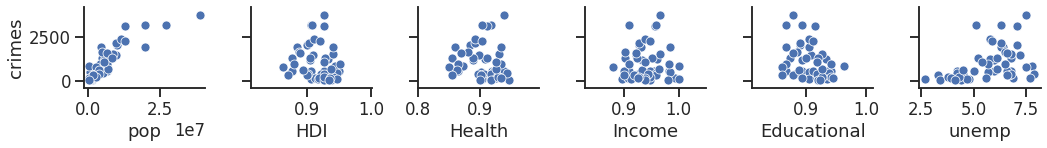

In [110]:
#Pairplot 2014
g = sns.pairplot(gdl2014,
                 y_vars=["crimes"],
                 x_vars=['pop', 'HDI', 'Health', 'Income', 'Educational', 'unemp'])


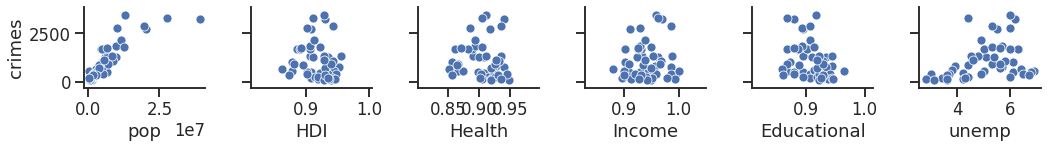

In [125]:
g = sns.pairplot(gdl2015, y_vars=["crimes"], x_vars=['pop', 'HDI', 'Health', 'Income', 'Educational', 'unemp'])

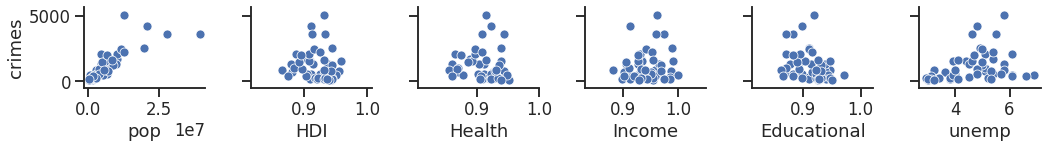

In [126]:
g = sns.pairplot(gdl2016, y_vars=["crimes"], x_vars=['pop', 'HDI', 'Health', 'Income', 'Educational', 'unemp'])

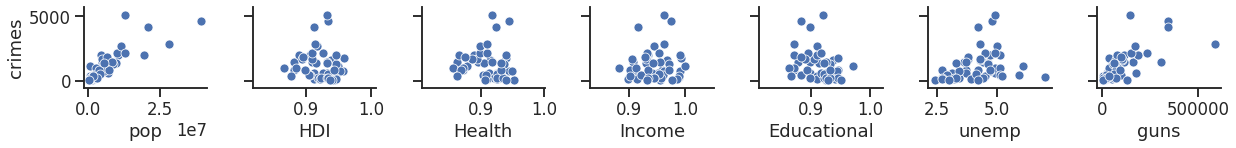

In [127]:
#PAIRPLOT - formatar o gráfico - 2017
g = sns.pairplot(gdl2017, 
                 y_vars=["crimes"],
                 x_vars=['pop', 'HDI', 'Health', 'Income', 'Educational', 'unemp', 'guns'])

# Gênero

In [128]:
#Load dataframe
gun_viol['year'] = pd.DatetimeIndex(gun_viol['date']).year
gun_viol.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013


In [142]:
#JOÃO Filtrando a tabela 

filtered_df = gun_viol[(gun_viol['participant_gender'].notnull()) & (gun_viol['participant_status'].notnull())]
filtered_df.count()

incident_id                    201758
date                           201758
state                          201758
city_or_county                 201758
address                        187435
n_killed                       201758
n_injured                      201758
incident_url                   201758
source_url                     201322
incident_url_fields_missing    201758
                                ...  
participant_age_group          192052
participant_gender             201758
participant_name               116412
participant_relationship        15588
participant_status             201758
participant_type               201758
sources                        201497
state_house_district           169968
state_senate_district          175399
year                           201758
Length: 30, dtype: int64

In [143]:
#Status Gender
status = filtered_df.loc[:, ['state','participant_gender', 'participant_status', 'year']]
status['participant_gender'] = status.participant_gender.str.replace('0::', '')
status['participant_gender'] = status.participant_gender.str.replace('1::', '')
status['participant_gender'] = status.participant_gender.str.replace('2::', '')
status['participant_gender'] = status.participant_gender.str.replace('3::', '')
status['participant_gender'] = status.participant_gender.str.replace('4::', '')
status['participant_gender'] = status.participant_gender.str.replace('5::', '')
status['participant_gender'] = status.participant_gender.str.replace('6::', '')
status['participant_status'] = status.participant_status.str.replace('0::', '')
status['participant_status'] = status.participant_status.str.replace('1::', '')
status['participant_status'] = status.participant_status.str.replace('2::', '')
status['participant_status'] = status.participant_status.str.replace('3::', '')
status['participant_status'] = status.participant_status.str.replace('4::', '')
status['participant_status'] = status.participant_status.str.replace('5::', '')
status['participant_status'] = status.participant_status.str.replace('6::', '')
status.head()

,state,participant_gender,participant_status,year
0,Pennsylvania,Male||Male||Male||Female,Arrested||Injured||Injured||Injured||Injured,2013
1,California,Male,Killed||Injured||Injured||Injured,2013
2,Ohio,Male||Male||Male||Male||Male,"Injured, Unharmed, Arrested||Unharmed, Arreste...",2013
3,Colorado,Female||Male||Male||Male,Killed||Killed||Killed||Killed,2013
4,North Carolina,Female||Male||Male||Female,Injured||Injured||Killed||Killed,2013


In [144]:
#Trabalhando na tabela - Gender
new = status.participant_gender.str.split("\|\|", expand=True)
status["T0"] = new[0]
status["T1"] = new[1]
status["T2"] = new[2]
status["T3"] = new[3]
status["T4"] = new[4]
status["T5"] = new[5]
status["T6"] = new[6]

status = status.replace({None: "ND"})
new.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,Male,Male,Male,Female,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Male,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Male,Male,Male,Male,Male,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Female,Male,Male,Male,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Female,Male,Male,Female,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [145]:
#Trabalalhando na tabela - Status 
new2 = status.participant_status.str.split("\|\|", expand=True)
status["S0"] = new2[0]
status["S1"] = new2[1]
status["S2"] = new2[2]
status["S3"] = new2[3]
status["S4"] = new2[4]
status["S5"] = new2[5]
status["S6"] = new2[6]

status = status.replace({None: "ND"})
new2.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,Arrested,Injured,Injured,Injured,Injured,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Killed,Injured,Injured,Injured,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,"Injured, Unharmed, Arrested","Unharmed, Arrested",Killed,Injured,Injured,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Killed,Killed,Killed,Killed,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Injured,Injured,Killed,Killed,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [146]:
#Ordenando a tabela 

status = status.loc[:, ['state', 'year', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
status.head()

,state,year,T0,T1,T2,T3,T4,T5,T6,S0,S1,S2,S3,S4,S5,S6
0,Pennsylvania,2013,Male,Male,Male,Female,ND,ND,ND,Arrested,Injured,Injured,Injured,Injured,ND,ND
1,California,2013,Male,ND,ND,ND,ND,ND,ND,Killed,Injured,Injured,Injured,ND,ND,ND
2,Ohio,2013,Male,Male,Male,Male,Male,ND,ND,"Injured, Unharmed, Arrested","Unharmed, Arrested",Killed,Injured,Injured,ND,ND
3,Colorado,2013,Female,Male,Male,Male,ND,ND,ND,Killed,Killed,Killed,Killed,ND,ND,ND
4,North Carolina,2013,Female,Male,Male,Female,ND,ND,ND,Injured,Injured,Killed,Killed,ND,ND,ND


In [147]:
m = {"FemaleKilled": "Female-Killed",
...:  "FemaleInjured": "Female-Injured",
...:  "MaleKilled": "Male-Killed",
...:  "MaleInjured": "Male-Injured"}

status["groupI"] = (status.T0 + status.S0).map(m)
status["groupII"] = (status.T1 + status.S1).map(m)
status["groupIII"] = (status.T2 + status.S2).map(m)
status["groupIV"] = (status.T3 + status.S3).map(m)
status["groupV"] = (status.T4 + status.S4).map(m)
status["groupVI"] = (status.T5 + status.S5).map(m)
status["groupVII"] = (status.T6 + status.S6).map(m)
status.head()

,state,year,T0,T1,T2,T3,T4,T5,T6,S0,...,S4,S5,S6,groupI,groupII,groupIII,groupIV,groupV,groupVI,groupVII
0,Pennsylvania,2013,Male,Male,Male,Female,ND,ND,ND,Arrested,...,Injured,ND,ND,NaN,Male-Injured,Male-Injured,Female-Injured,NaN,NaN,NaN
1,California,2013,Male,ND,ND,ND,ND,ND,ND,Killed,...,ND,ND,ND,Male-Killed,NaN,NaN,NaN,NaN,NaN,NaN
2,Ohio,2013,Male,Male,Male,Male,Male,ND,ND,"Injured, Unharmed, Arrested",...,Injured,ND,ND,NaN,NaN,Male-Killed,Male-Injured,Male-Injured,NaN,NaN
3,Colorado,2013,Female,Male,Male,Male,ND,ND,ND,Killed,...,ND,ND,ND,Female-Killed,Male-Killed,Male-Killed,Male-Killed,NaN,NaN,NaN
4,North Carolina,2013,Female,Male,Male,Female,ND,ND,ND,Injured,...,ND,ND,ND,Female-Injured,Male-Injured,Male-Killed,Female-Killed,NaN,NaN,NaN


In [148]:
#Combinando gênero e status 
relationship = status.loc[:,['state','year', 'groupI', 'groupII', 'groupIII', 'groupIV', 'groupV', 'groupVI', 'groupVII']]
relationship.head()

,state,year,groupI,groupII,groupIII,groupIV,groupV,groupVI,groupVII
0,Pennsylvania,2013,NaN,Male-Injured,Male-Injured,Female-Injured,NaN,NaN,NaN
1,California,2013,Male-Killed,NaN,NaN,NaN,NaN,NaN,NaN
2,Ohio,2013,NaN,NaN,Male-Killed,Male-Injured,Male-Injured,NaN,NaN
3,Colorado,2013,Female-Killed,Male-Killed,Male-Killed,Male-Killed,NaN,NaN,NaN
4,North Carolina,2013,Female-Injured,Male-Injured,Male-Killed,Female-Killed,NaN,NaN,NaN


In [139]:
#group I
relationship.groupby("state")['groupI'].value_counts().to_frame().head()

,,groupI
state,groupI,


In [149]:
#agrupando os grupos por estado
state_grouped = relationship.groupby(['state']).agg({'groupI': 'value_counts', 'groupII': 'value_counts', 'groupIII': 'value_counts', 'groupIV': 'value_counts', 'groupV': 'value_counts', 'groupVI': 'value_counts', 'groupVII': 'value_counts'}).reset_index()
state_grouped.head()

,level_0,level_1,groupI,groupII,groupIII,groupIV,groupV,groupVI,groupVII
0,Alabama,Female-Injured,300,96.0,28.0,2.0,NaN,NaN,NaN
1,Alabama,Female-Killed,242,40.0,4.0,NaN,1.0,NaN,NaN
2,Alabama,Male-Injured,1612,327.0,63.0,17.0,5.0,NaN,1.0
3,Alabama,Male-Killed,1310,184.0,20.0,8.0,1.0,1.0,NaN
4,Alaska,Female-Injured,39,10.0,NaN,1.0,NaN,NaN,NaN


In [150]:
#calculando o total por estado de todos os grupos 
state_grouped['Total'] = state_grouped.sum(axis=1)
state_grouped.head()

,level_0,level_1,groupI,groupII,groupIII,groupIV,groupV,groupVI,groupVII,Total
0,Alabama,Female-Injured,300,96.0,28.0,2.0,NaN,NaN,NaN,426.0
1,Alabama,Female-Killed,242,40.0,4.0,NaN,1.0,NaN,NaN,287.0
2,Alabama,Male-Injured,1612,327.0,63.0,17.0,5.0,NaN,1.0,2025.0
3,Alabama,Male-Killed,1310,184.0,20.0,8.0,1.0,1.0,NaN,1524.0
4,Alaska,Female-Injured,39,10.0,NaN,1.0,NaN,NaN,NaN,50.0


In [151]:
#gerando o dataframe para gênero com os estados e o total
gender_df = pd.DataFrame()
gender_df['state'] = state_grouped['level_0']
gender_df['status'] = state_grouped['level_1']
gender_df['Total'] = state_grouped['Total']
gender_df.head(10)

,state,status,Total
0,Alabama,Female-Injured,426.0
1,Alabama,Female-Killed,287.0
2,Alabama,Male-Injured,2025.0
3,Alabama,Male-Killed,1524.0
4,Alaska,Female-Injured,50.0
5,Alaska,Female-Killed,56.0
6,Alaska,Male-Injured,231.0
7,Alaska,Male-Killed,203.0
8,Arizona,Female-Injured,149.0
9,Arizona,Female-Killed,193.0


In [155]:
#filtro
sum_crimes = gender_df.groupby(['state'])['Total'].sum()
sum_crimes.head()

state
Alabama        4262.0
Alaska          540.0
Arizona        1949.0
Arkansas       1875.0
California    11558.0
Name: Total, dtype: float64

In [156]:
#interseção
df_intersec = pd.merge(gender_df, sum_crimes, how='inner', on=['state'])
df_intersec.head()

,state,status,Total_x,Total_y
0,Alabama,Female-Injured,426.0,4262.0
1,Alabama,Female-Killed,287.0,4262.0
2,Alabama,Male-Injured,2025.0,4262.0
3,Alabama,Male-Killed,1524.0,4262.0
4,Alaska,Female-Injured,50.0,540.0


In [157]:
#normalizando os dados 
gender_df['Relative'] = (df_intersec['Total_x']/df_intersec['Total_y'])*100
gender_df.head()

,state,status,Total,Relative
0,Alabama,Female-Injured,426.0,9.995307
1,Alabama,Female-Killed,287.0,6.733928
2,Alabama,Male-Injured,2025.0,47.512905
3,Alabama,Male-Killed,1524.0,35.757860
4,Alaska,Female-Injured,50.0,9.259259


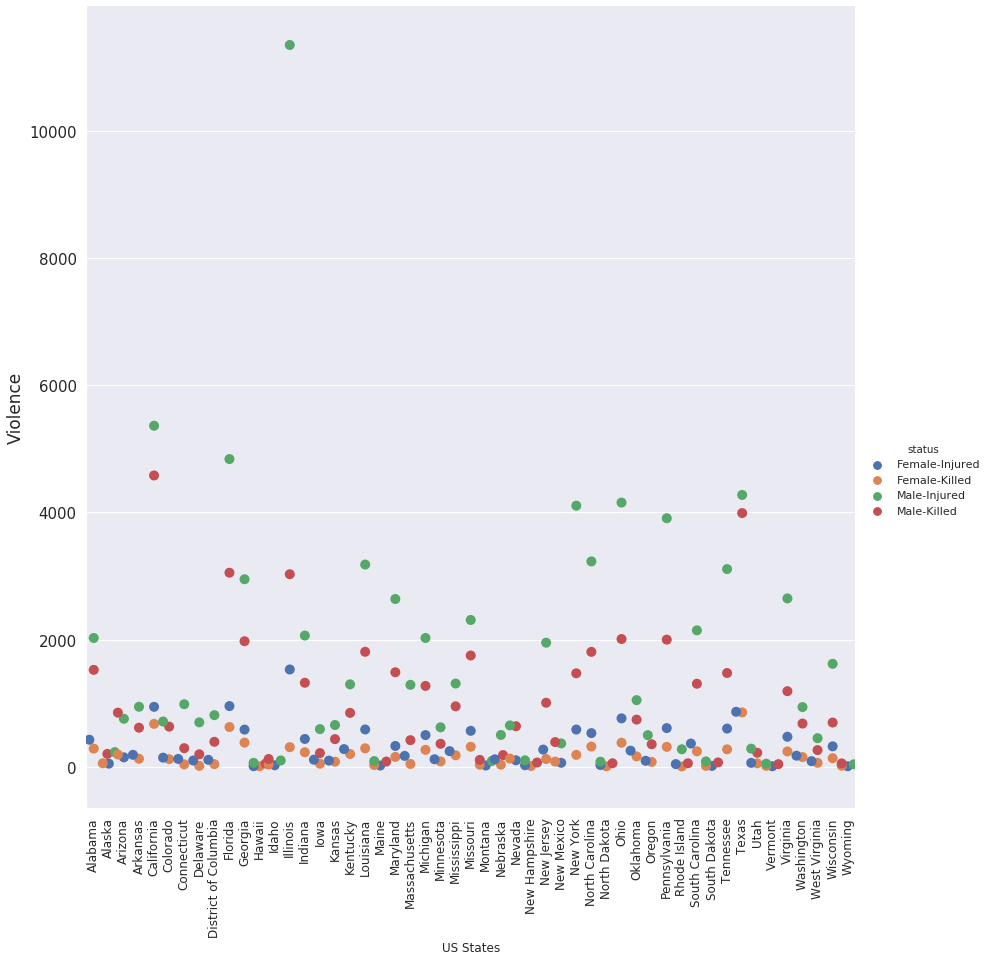

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='darkgrid')

sns.catplot(x='state', y='Total', 
            kind='swarm',
            data=gender_df,
           hue='status', height = 12, s = 10).set_xticklabels(rotation=90)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.xlabel("US States", fontsize=12)
plt.ylabel("Violence", fontsize=17)

plt.show()

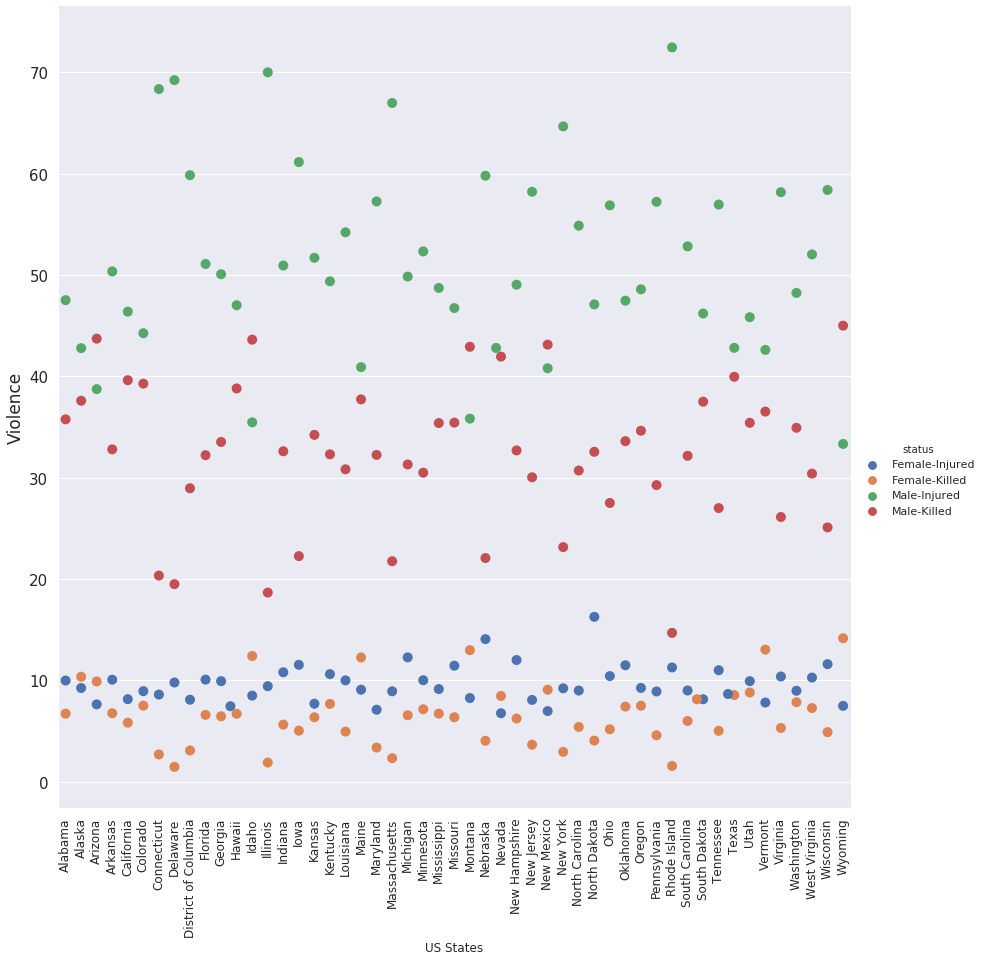

In [159]:
sns.catplot(x='state', y='Relative', 
            kind='swarm',
            data=gender_df,
           hue='status', height = 12, s = 10).set_xticklabels(rotation=90)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.xlabel("US States", fontsize=12)
plt.ylabel("Violence", fontsize=17)

plt.show()

# Mapa USA

In [209]:
df_mapa = gun_viol.loc[:1000, ['state', 'city_or_county', 'latitude', 'longitude', 'year', 'n_killed', 'n_injured']]
df_mapa.head()

,state,city_or_county,latitude,longitude,year,n_killed,n_injured
0,Pennsylvania,Mckeesport,40.3467,-79.8559,2013,0,4
1,California,Hawthorne,33.9090,-118.3330,2013,1,3
2,Ohio,Lorain,41.4455,-82.1377,2013,1,3
3,Colorado,Aurora,39.6518,-104.8020,2013,4,0
4,North Carolina,Greensboro,36.1140,-79.9569,2013,2,2


In [ ]:
import plotly.graph_objects as go

import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
#df.head()

df_mapa['text'] = df_mapa['state'] + ": " + df_mapa['city_or_county']
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_mapa[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_mapa['longitude'],
        lat = df_mapa['latitude'],
        text = df_mapa['text'],
        marker = dict(
            size = df_mapa['n_killed'],
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2013-2018 US Gun incidents<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

# Conclusões



PERGUNTAS:
1) EXISTE UM AUMENTO NO NÚMERO DE PESSOAS ACOMETIDAS PELOS CRIMES COM ARMAS AO LONGO DOS ANOS ANALISADOS?
2) EXISTEM MESES QUE APRESENTAM UM MAIOR NÚMERO DE PESSOAS ACOMETIDAS PELOS CRIMES COM ARMAS NOS USA?
3) QUAIS SÃO OS TOP10 ESTADOS COM MAIOR E MENOR NÚMERO DE PESSOAS ACOMETIDAS PELOS CRIMES COM ARMAS?
4) QUAIS SÃO AS CIDADES MAIS VIOLENTAS? ELAS ENCONTRAM-SE NOS ESTADOS MAIS VIOLENTOS?
5) EXISTEM DIFERENÇAS NO INCREMENTO PERCENTUAL DE PESSOAS ACOMETIDAS PELOS CRIMES COM ARMAS NOS USA DE UM ANO PARA O OUTRO? 
6) HÁ DIFERENÇA ENTRE GÊNEROS EM RELAÇÃO AOS INCIDENTES ENVOLVIDO ARMAS NOS USA?
7) EXISTE CORRELAÇÃO ENTRE O DE CRIMES COM ARMAS COM O TAMANHO POPULACIONAL E ÍNDICES SOCIAIS?


Conlusão 1: Existe um aumento no número de pessoas que são acometidas pelos crimes com arma nos USA

Conclusão 2: Julho e agosto são os meses com maior número de pessoas mortas e machucadas com armas nos USA   

Conclusão 3: Os estados com maior e menor número de pessoas acometidas pelos crimes com armas nos USA se repetem ao longo dos anos

Conclusão 4:As cidades mais violentas encontram-se nos estados mais violentos  

Conclusão 5: Existem estados que apresentaram reduções em seus percentuais de um ano para o outro. Essa redução pode estar relacionada com a rigidez nas leis de porte de armas. Com os dados de 2017 foi observada uma correlação forte positiva e significativa entre número de crimes e número de armas. 

Conclusão 6: Homens morrem mais do que mulheres

Conclusão 7: Crimes com armas são correlacionados positivamente com população e número de armas
 

